# Meme Kanseri ve Mamografik Kitle Verileri İncelemesi

## Veri Çerçevesini Tanımak

Bu veri çerçevesi UCI Machine Learning Repository üzerinden temin edilmiştir. Veri çerçevesi, hastanın kötü huylu kitleye sahip olup olmadığını tespit edebilmek için hastanın belirli niteliklerini temsil eden 6 özniteliğe sahiptir. Veri çerçevesi 961 hastanın kaydı tutularak elde edilmiştir. Veri çerçevesi 516 iyi huylu, 445 kötü huylu kitle barındırır, dolayısıyla dengesiz bir veri çerçevesi değildir.

#### 1 Öznitelik: Age, hastanın yaşını temsil eden özniteliktir.

#### 2 Öznitelik: BMI, hastanın vücut kitle indeksini temsil eden özniteliktir.

#### 3 Öznitelik: Glucose, kitlenin şeklini temsil eden özniteliktir.
    Eğer 1 ise yuvarlak kitle.
    Eğer 2 ise oval kitle.
    Eğer 3 ise lobüler kitle.
    Eğer 4 ise düzensiz(nominal) kitle.
#### 4 Öznitelik: Insulin, kitlenin marjını temsil eden özniteliktir.
    Eğer 1 ise çevrelenmiştir.
    Eğer 2 ise mikrolobüllenmiş. 
    Eğer 3 ise gizlenmiş.
    Eğer 4 ise kötü huylu olarak tanımlanmış.
    Eğer 5 ise hareketli kitle.
#### 5 Öznitelik: HOMA, kitlenin yoğunluğunu temsil eden özniteliktir.
    Eğer 1 ise yüksek.
    Eğer 2 ise dengeli.
    Eğer 3 ise zayıf.
    Eğer 4 ise yağlı.
#### 6 Öznitelik: Leptin, kitlenin iyi veya kötü huylu olduğunu temsil eden özniteliktir.
    Eğer 0 ise bening(iyi huylu).
    Eğer 1 ise malign(kötü huylu).

#### 6 Öznitelik: Adiponectin, kitlenin iyi veya kötü huylu olduğunu temsil eden özniteliktir.
#### 7 Öznitelik: Resistin, kitlenin iyi veya kötü huylu olduğunu temsil eden özniteliktir.
#### 8 Öznitelik: MCP.1, kitlenin iyi veya kötü huylu olduğunu temsil eden özniteliktir.
#### 9 Öznitelik: Classification, kitlenin iyi veya kötü huylu olduğunu temsil eden özniteliktir.
    Eğer 1 ise bening(iyi huylu).
    Eğer 2 ise malign(kötü huylu).

#### Kaynaklar:

#### (a) Veritabanının orijinal sahipleri:
        Rüdiger Schulz-Wendtland
        Radyoloji Enstitüsü, Jinekolojik Radyoloji, Erlangen-Nuremberg Üniversitesi
        Universitätsstraße 21-23
        91054 Erlangen, Almanya
#### (b Veritabanının donörü:
        Matthias Elter
        Fraunhofer Tümleşik Devreler Enstitüsü (IIS)
        Görüntü İşleme ve Tıp Mühendisliği Bölümü (BMT)
        Am Wolfsmantel 33
        91058 Erlangen, Almanya
        matthias.elter@iis.fraunhofer.de
        (49) 9131-7767327
#### (c) Alındığı tarih: Ekim 2007

#### Veri Çerçevesinin Oluşturulma Amacı ve Çıkarılabilecek Yorumları
Günümüzde meme kanseri taramasında en etkili yöntem mamografidir. Mamografi, meme ultrason ve meme MR raporlarını standardize etmek için geliştirilmiştir, böylece radyolog olmayanların da raporu anlaması kolaylaştırılmıştır. BI-RADS sınıflamasının özelliği ve güzel yanı, sadece lezyonu tanımlamakla kalmayıp, lezyonun ne olabileceği hakkında bilgi vermesidir. Daha önemlisi lezyonun benign - malign olma ihtimalleri değerlendirilerek yapılması gerekeni önermesidir. Bu sayede gereksiz biyopsilerin önüne geçilmiş olur. Ayrıca henüz biyopsi yapılmadan hastanın ve kitlinin birkaç özniteliğine bakarak meme kanseri üzerine güvenilirliği yüksek pek çok enformasyon elde edilebilir.

# Veri Çerçevesini ve Kütüphaneleri Yüklemek

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, log_loss, brier_score_loss, jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from pandas.api.types import CategoricalDtype
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("krediVeriseti.csv", sep = ";").copy()

In [3]:
df.sample(5)

,krediMiktari,yas,evDurumu,aldigi_kredi_sayi,telefonDurumu,KrediDurumu
685,6527,34,kiraci,1,var,krediver
254,2030,24,evsahibi,1,var,krediver
282,1445,49,evsahibi,1,yok,krediver
293,4796,56,kiraci,1,yok,krediver
536,1374,75,evsahibi,1,var,krediver


# Veri Çerçevesine İlk Bakış

In [4]:
df.shape

(1000, 6)

Veri çerçevesi 1000 gözlem ve 6 öznitelikten oluşmakta.

In [5]:
df.dtypes

krediMiktari          int64
yas                   int64
evDurumu             object
aldigi_kredi_sayi     int64
telefonDurumu        object
KrediDurumu          object
dtype: object

Veri çerçevesinde bulunan 10 özniteliğin değişken tipleri verilmekte.

In [6]:
df.isnull().sum()

krediMiktari         0
yas                  0
evDurumu             0
aldigi_kredi_sayi    0
telefonDurumu        0
KrediDurumu          0
dtype: int64

Veri çerçevesinde hangi öznitelikten kaç adet eksik veri olduğuna göz atıyoruz. Hiçbir eksik veri barındıran gözlemimiz yok.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
krediMiktari,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
yas,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
aldigi_kredi_sayi,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0


Veri çerçevesinde sayısal özniteliklerin temel istatistik bilgileri görüntülenmekte. Daha efektif görüntüleyebilmek için transpozesini aldık.

In [8]:
df.corr()

,krediMiktari,yas,aldigi_kredi_sayi
krediMiktari,1.000000,0.032716,0.020795
yas,0.032716,1.000000,0.149254
aldigi_kredi_sayi,0.020795,0.149254,1.000000


Veri çerçevesinde birbiriyle arasında ilişki bulunan öznitelikleri daha yakından görmek için korelasyon katsayılarına bakarız. Korelasyon katsayıları doğru veya ters orantılı bir ilişkinin ne kadar kuvvetli olduğunu belirtmekte etkilidir.  

# Veri Ön İşleme

In [17]:
df.dtypes

krediMiktari         int64
yas                  int64
evDurumu             int64
aldigi_kredi_sayi    int64
telefonDurumu        int64
KrediDurumu          int64
dtype: object

In [10]:
df.head()

,krediMiktari,yas,evDurumu,aldigi_kredi_sayi,telefonDurumu,KrediDurumu
0,1169,67,evsahibi,2,var,krediver
1,5951,22,evsahibi,1,yok,verme
2,2096,49,evsahibi,1,yok,krediver
3,7882,45,kiraci,1,yok,krediver
4,4870,53,kiraci,2,yok,verme


In [11]:
df["evDurumu"].value_counts()

evsahibi    713
kiraci      287
Name: evDurumu, dtype: int64

In [12]:
from pandas.api.types import CategoricalDtype
df["evDurumu"].replace("evsahibi",1, inplace = True)
df["evDurumu"].replace("kiraci",0, inplace= True)
#df["evDurumu"] = df["evDurumu"].astype(CategoricalDtype(ordered = True))

In [13]:
df["telefonDurumu"].replace("var",1, inplace = True)
df["telefonDurumu"].replace("yok",0, inplace= True)
#df["telefonDurumu"] = df["telefonDurumu"].astype(CategoricalDtype(ordered = True))

In [14]:
df["KrediDurumu"].replace("krediver",1, inplace = True)
df["KrediDurumu"].replace("verme",0, inplace= True)
#df["KrediDurumu"] = df["KrediDurumu"].astype(CategoricalDtype(ordered = True))

In [15]:
df.head()

,krediMiktari,yas,evDurumu,aldigi_kredi_sayi,telefonDurumu,KrediDurumu
0,1169,67,1,2,1,1
1,5951,22,1,1,0,0
2,2096,49,1,1,0,1
3,7882,45,0,1,0,1
4,4870,53,0,2,0,0


In [16]:
df.dtypes

krediMiktari         int64
yas                  int64
evDurumu             int64
aldigi_kredi_sayi    int64
telefonDurumu        int64
KrediDurumu          int64
dtype: object

# Makine Öğrenmesi Modelleme

In [21]:
y = df["KrediDurumu"]
X = df.drop(["KrediDurumu"], axis = 1)

Görselleştirmede bize yardımcı olacak şekilde değiştirdiğimiz öznitelik formatlarının tamamını makine öğrenmesi modelleri için sayısal tipe dönüştürüyoruz. Ardından y ve X olmak üzere verileri makine öğrenmesine girmeden önce bağımlı ve bağımsız öznitelikler olmak üzere ayırıyoruz.

In [22]:
lojistik = sm.Logit(y,X)
lojistikModel = lojistik.fit()

Optimization terminated successfully.
         Current function value: 0.584791
         Iterations 5


"lojistik" ismiyle yarattığımız değişkene statsmodel kütüphanesinin "Logit()" fonksiyonu aracılığıyla bağımlı ve bağımsız değişkenleri parametre verdik. Sonrasında modeli eğittik. Modelin bize vereceği bilgiler için "summary()" fonksiyonunu kullanırız.

In [23]:
lojistikModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            KrediDurumu   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Nov 2019   Pseudo R-squ.:                 0.04268
Time:                        19:26:42   Log-Likelihood:                -584.79
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 1.286e-10
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
krediMiktari         -0.0001   2.46e-05     -5.074      0.000      -0.000   -7.66e-05
yas                   0.0171      0.005      3.404      0.001       0.007       0.027
evDurumu              0.5555      0.142      3.906      0.000       0.277       0.834
aldigi_kredi_sayi     0.1126      0.114      0.989      0.323      -0.111       0.336
telefonDurumu         0.3434      0.155      2.211      0.027       0.039       0.648
=====================================================================================
"""

Statsmodels, kullanıcıların verileri keşfetmesine, istatistiksel modelleri tahmin etmesine ve istatistiksel testleri yapmasına izin veren bir Python kütüphanesidir. Burada yapılan işlem, kanser tahmini yapmamıza yardımcı olacak özniteliklerin katsayılarını(coef) ve olasılık değerlerini(p-value) görmektir. P<|z| sütunu, olasılık değerini temsil eder ve görüldüğü üzere olasılık değeri 0.05'den küçük olan her öznitelik model için anlamlı ve tutarlıdır.

## Eğitim ve Test Bölümlemesi

Makine öğrenmesi modelleri için eğitim ve test olmak üzere veri çerçevemizi ikiye bölüp, bunlar arasında da X ve y olmak üzere ikiye bölüyoruz. Böylelikle veri çerçevemiz dört parçaya ayrılmış oluyor. Makine öğrenmesi modellerinin tamamını gerçekleştirdikten sonra modelleri mukayese edebilmek için sonuclar isimli bir veri çerçevesi oluşturuyoruz.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Makine Öğrenmesi Modelleme

Makine öğrenmesi için "statsmodel" ile birlikte toplamda 12 adet algoritma kullanmış olacağız. Tüm bu algoritmaları mukayese edebilmek için bir skorlama uygulayacağız. Bunun için "sonuclar" isimli veri çerçevesi yaratırız.

In [38]:
sonuclar = pd.DataFrame(columns = ["Model","ConfusionMatrixScore", "CrossValScore", "ROC_AUC_Score", "AUC", "RecallScore", "F1Score", "PrecisionScore", "JaccardScore", "BrierScore", "BalancedAccuracyScore","LogLoss"])

## Lojistik Regresyon Modeli İnşası ve Eğitimi

Lojistik regresyon algoritmasını sınıflandırma problemi için 4 parçaya ayırdığımız veri çerçevesini kullanarak inşa ederiz.

In [39]:
lojistik = LogisticRegression()

In [40]:
lojistikModel = lojistik.fit(X_train, y_train)

Lojistik regresyon algoritması için parametre optimizasyonu yapmayacağız. Bu algoritma için kritik ve kayda değer bir parametre olmadığı gibi başarı skorlarında radikal bir değişiklik de olmamakta. Lojistik regresyon algoritmasında hiçbir parametre vermediğimizde varsayılan olarak girilen parametreler aşağıda görüntülenmektedir.

In [41]:
lojistikModel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Lojistik regresyon mdelini kurduk ve eğitim verilerini parametre olarak girerek modeli eğittik. Ayrıca lojistik regresyon modeli için kullanabileceğimiz tüm parametreler ve varsayılan değerleri belirtilmiştir.

## Lojistik Regresyon Modeli Tahminleri ve Başarı Metrikleri

Tahmin için kurduğumuz modelin "predict()" fonksiyonuna test için ayırdığımız X_test parametresini vereceğiz. 

In [42]:
y_pred = lojistikModel.predict(X_test)

Bu sayede tahmin değerleri ile gerçek değerleri gözlemleyebileceğimiz karmaşıklık matrisini çizdirebiliriz. 

In [43]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[  5  67]
 [ 10 168]]


Karmaşıklık matrisi ile modelin doğru ve yanlış tahminlerini mukayese edebiliriz. Sol üst ve sağ alt doğru tahmin çıktıları iken, diğer köşegen yanlış tahmin çıktılarıdır. Aşağıda yapılan işlemler sonucu modelin karmaşıklık matris için başarı skoru yüzdelik bazda görüntülenmektedir.

In [44]:
ConfusionMatrixScore = (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1])
ConfusionMatrixScore  = ConfusionMatrixScore*100
ConfusionMatrixScore

69.19999999999999

Hazır fonksiyon olan "accuracy_score()" ile de aynı çıktıyı alırsak skorun sağlamasını yapmış olacağız.

In [45]:
accuracy_score(y_test, y_pred)

0.692

Öte yandan sınıflandırma raporu olarak da bilinen "classification_report()" fonksiyonu bize model hakkında pek çok ayrıntılı bilgiyi detaylı olarak sunar. Modelin başarı durumunu özetleyen, doğruluk, duyarlılık, destek, ağırlıklı ortalama, F istatistikleri gibi pek çok başarı metriğine sınıflandırma raporunu kullanarak erişebiliriz.

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.07      0.11        72
           1       0.71      0.94      0.81       178

    accuracy                           0.69       250
   macro avg       0.52      0.51      0.46       250
weighted avg       0.61      0.69      0.61       250



Sınıflandırma algoritmalarında kullanılan pek çok başarı metriği bazı durumlarda yanıltıcı olabilmektedir. Bu gibi durumlar için ROC - AUC grafiği çizdirilir ve ROC eğrisinin(mavi çizgi) altında kalan alanın büyüklüğü modelin doğruluğu hakkında bize fikir verir. Kırmızı kesikli çizgi ise modelin başarısının %50 olduğu durumu temsil eder. 

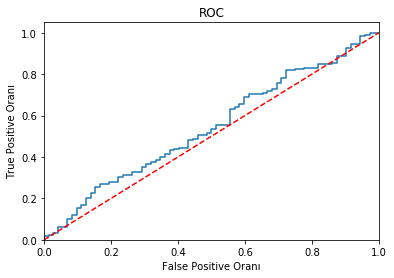

In [47]:
logit_roc_auc = roc_auc_score(y_test, lojistikModel.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, lojistikModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Burada önemli olan AUC(area under curve) dediğimiz çizdirdiğimiz çizginin altında kalan alanın büyüklüğüdür. Söz konusu alan 1'e ne kadar yakınsa model o kadar başarılı sayılır.

In [48]:
AUC = metrics.auc(fpr, tpr)
AUC = AUC * 100
AUC

54.20568039950062

Diğer başarı metrikleri gibi bunu da yüzdelik biçime çevirdik.

Tek bir defa başarı skoruna bakmak, model hakkında karar vermek için çok erken ve yanıltıcıdır. Modeli defalarca farklı test ve eğitim olacak şekilde kombinleyerek skorlamak daha sağlıklı olacaktır.

In [49]:
cross_val_score(lojistikModel, X_test, y_test, cv = 10)

array([0.69230769, 0.65384615, 0.72      , 0.72      , 0.72      ,
       0.72      , 0.72      , 0.72      , 0.70833333, 0.70833333])

Modeli 10 defa skorladık, bunların ortalamasını alarak daha kesin bir sonuç elde edebiliriz.

In [50]:
CrossValScore = cross_val_score(lojistikModel, X_test, y_test, cv = 10).mean()
CrossValScore = CrossValScore * 100
CrossValScore

70.82820512820513

In [51]:
PrecisionScore = metrics.precision_score(y_test, y_pred, average='weighted')
PrecisionScore = PrecisionScore * 100
PrecisionScore

60.5004255319149

In [52]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore = RecallScore * 100
RecallScore

69.19999999999999

In [53]:
F1Score = f1_score(y_test, y_pred, average='weighted')  
F1Score = F1Score * 100
F1Score

61.23576855639977

In [54]:
ROC_AUC_Score = roc_auc_score(y_test, y_pred)
ROC_AUC_Score = ROC_AUC_Score * 100
ROC_AUC_Score

50.66323345817728

10 kez katlamalı çapraz doğrulama skorlarının ortalaması 0 ile 1 arasında bir olasılık değeridir. 100 ile çarptığımızda yüzdelik olarak almış oluruz.

In [55]:
LogLoss = log_loss(y_test, y_pred)
LogLoss

10.638157421743783

In [56]:
BrierScore = brier_score_loss(y_test, y_pred)
BrierScore = 100 - BrierScore
BrierScore

99.692

In [57]:
BalancedAccuracyScore = balanced_accuracy_score(y_test, y_pred)
BalancedAccuracyScore = BalancedAccuracyScore * 100
BalancedAccuracyScore

50.66323345817728

In [58]:
JaccardScore = jaccard_score(y_test, y_pred)
JaccardScore = JaccardScore * 100
JaccardScore

68.57142857142857

In [59]:
sonuc = pd.DataFrame([["Lojistik Regresyon", ConfusionMatrixScore, CrossValScore, ROC_AUC_Score, AUC, RecallScore, F1Score, PrecisionScore, JaccardScore, BrierScore, BalancedAccuracyScore, LogLoss]], columns= ["Model", "ConfusionMatrixScore", "CrossValScore", "ROC_AUC_Score", "AUC", "RecallScore", "F1Score", "PrecisionScore", "JaccardScore","BrierScore","BalancedAccuracyScore", "LogLoss"])
sonuclar = sonuclar.append(sonuc)

## Gaussian Navie Bayes Modeli İnşası ve Eğitimi

In [61]:
nb = GaussianNB()

In [62]:
nb_model = nb.fit(X_train, y_train)

Modeli kurar ve eğitiriz.

In [63]:
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

## Gaussian Navie Bayes Modeli Tahminleri ve Başarı Metrikleri

Tahmin için kurduğumuz modelin "predict()" fonksiyonuna test için ayırdığımız X_test parametresini vereceğiz. 

In [64]:
y_pred = nb_model.predict(X_test)

Bu sayede tahmin değerleri ile gerçek değerleri gözlemleyebileceğimiz karmaşıklık matrisini çizdirebiliriz. 

In [65]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[  9  63]
 [ 12 166]]


Karmaşıklık matrisi ile modelin doğru ve yanlış tahminlerini mukayese edebiliriz. Sol üst ve sağ alt doğru tahmin çıktıları iken, diğer köşegen yanlış tahmin çıktılarıdır. Aşağıda yapılan işlemler sonucu modelin karmaşıklık matris için başarı skoru yüzdelik bazda görüntülenmektedir.

In [66]:
ConfusionMatrixScore = (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1])
ConfusionMatrixScore  = ConfusionMatrixScore*100
ConfusionMatrixScore

70.0

Hazır fonksiyon olan "accuracy_score()" ile de aynı çıktıyı alırsak skorun sağlamasını yapmış olacağız.

In [67]:
accuracy_score(y_test, y_pred)

0.7

Öte yandan sınıflandırma raporu olarak da bilinen "classification_report()" fonksiyonu bize model hakkında pek çok ayrıntılı bilgiyi detaylı olarak sunar. Modelin başarı durumunu özetleyen, doğruluk, duyarlılık, destek, ağırlıklı ortalama, F istatistikleri gibi pek çok başarı metriğine sınıflandırma raporunu kullanarak erişebiliriz.

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.12      0.19        72
           1       0.72      0.93      0.82       178

    accuracy                           0.70       250
   macro avg       0.58      0.53      0.50       250
weighted avg       0.64      0.70      0.64       250



Sınıflandırma algoritmalarında kullanılan pek çok başarı metriği bazı durumlarda yanıltıcı olabilmektedir. Bu gibi durumlar için ROC - AUC grafiği çizdirilir ve ROC eğrisinin(mavi çizgi) altında kalan alanın büyüklüğü modelin doğruluğu hakkında bize fikir verir. Kırmızı kesikli çizgi ise modelin başarısının %50 olduğu durumu temsil eder. 

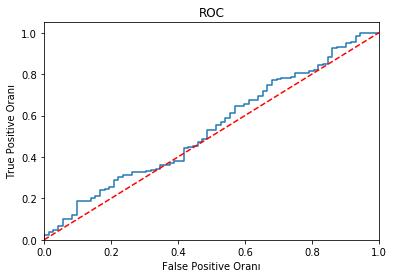

In [69]:
logit_roc_auc = roc_auc_score(y_test, nb_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Burada önemli olan AUC(area under curve) dediğimiz çizdirdiğimiz çizginin altında kalan alanın büyüklüğüdür. Söz konusu alan 1'e ne kadar yakınsa model o kadar başarılı sayılır.

In [70]:
AUC = metrics.auc(fpr, tpr)
AUC = AUC * 100
AUC

53.628277153558045

Diğer başarı metrikleri gibi bunu da yüzdelik biçime çevirdik.

Tek bir defa başarı skoruna bakmak, model hakkında karar vermek için çok erken ve yanıltıcıdır. Modeli defalarca farklı test ve eğitim olacak şekilde kombinleyerek skorlamak daha sağlıklı olacaktır.

In [71]:
cross_val_score(nb_model, X_test, y_test, cv = 10)

array([0.65384615, 0.69230769, 0.64      , 0.84      , 0.72      ,
       0.76      , 0.68      , 0.6       , 0.75      , 0.66666667])

Modeli 10 defa skorladık, bunların ortalamasını alarak daha kesin bir sonuç elde edebiliriz.

In [72]:
CrossValScore = cross_val_score(nb_model, X_test, y_test, cv = 10).mean()
CrossValScore = CrossValScore * 100
CrossValScore

70.02820512820513

In [73]:
PrecisionScore = metrics.precision_score(y_test, y_pred, average='weighted')
PrecisionScore = PrecisionScore * 100
PrecisionScore

63.95508421709295

In [74]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore = RecallScore * 100
RecallScore

70.0

In [75]:
F1Score = f1_score(y_test, y_pred, average='weighted')  
F1Score = F1Score * 100
F1Score

63.65380042799398

In [76]:
ROC_AUC_Score = roc_auc_score(y_test, y_pred)
ROC_AUC_Score = ROC_AUC_Score * 100
ROC_AUC_Score

52.87921348314606

10 kez katlamalı çapraz doğrulama skorlarının ortalaması 0 ile 1 arasında bir olasılık değeridir. 100 ile çarptığımızda yüzdelik olarak almış oluruz.

In [77]:
LogLoss = log_loss(y_test, y_pred)
LogLoss

10.361834417025614

In [78]:
BrierScore = brier_score_loss(y_test, y_pred)
BrierScore = 100 - BrierScore
BrierScore

99.7

In [79]:
BalancedAccuracyScore = balanced_accuracy_score(y_test, y_pred)
BalancedAccuracyScore = BalancedAccuracyScore * 100
BalancedAccuracyScore

52.87921348314606

In [80]:
JaccardScore = jaccard_score(y_test, y_pred)
JaccardScore = JaccardScore * 100
JaccardScore

68.87966804979253

In [81]:
sonuc = pd.DataFrame([["Gaussian Navie Bayes", ConfusionMatrixScore, CrossValScore, ROC_AUC_Score, AUC, RecallScore, F1Score, PrecisionScore, JaccardScore, BrierScore, BalancedAccuracyScore, LogLoss]], columns= ["Model", "ConfusionMatrixScore", "CrossValScore", "ROC_AUC_Score", "AUC", "RecallScore", "F1Score", "PrecisionScore", "JaccardScore","BrierScore","BalancedAccuracyScore", "LogLoss"])
sonuclar = sonuclar.append(sonuc)

## K - Nearest Neighbors Modeli İnşası ve Eğitimi

In [82]:
knn = KNeighborsClassifier()

In [83]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNN tanımı gereği en yakın komşulardan yola çıkarak tahmin yapan bir algoritmadır ve en yakın komşu sayısı algoritmanın başarısı için oldukça kritiktir. Görüldüğü üzere n_neighbors parametresi varsayılan olarak 5 girilmiştir ancak 5 en elverişli komşu sayısı olmayabilir. GridSearchCV fonksiyonu ile belirlediğimiz aralıkta komşu sayıları için modeli tekrar tekrar çalıştırıp en uygun komşu sayısı ile modeli eğiteceğiz.

In [84]:
knn_params = {"n_neighbors": np.arange(1,50)}
knn_cv = GridSearchCV(knn, knn_params, cv = 10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [85]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi komşu sayısı: " + str(knn_cv.best_params_))

En iyi skor:0.6986666666666667
En iyi komşu sayısı: {'n_neighbors': 15}


En iyi komşu sayısı ile modeli kurup eğitebiliriz.

In [86]:
knn = KNeighborsClassifier(15)
knn_tuned = knn.fit(X_train, y_train)

Tahmin için kurduğumuz modelin "predict()" fonksiyonuna test için ayırdığımız X_test parametresini vereceğiz. 

## K - Nearest Neighbors Modeli Tahminleri ve Başarı Metrikleri

In [87]:
y_pred = knn_tuned.predict(X_test)

Bu sayede tahmin değerleri ile gerçek değerleri gözlemleyebileceğimiz karmaşıklık matrisini çizdirebiliriz. 

In [88]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[ 10  62]
 [ 16 162]]


Karmaşıklık matrisi ile modelin doğru ve yanlış tahminlerini mukayese edebiliriz. Sol üst ve sağ alt doğru tahmin çıktıları iken, diğer köşegen yanlış tahmin çıktılarıdır. Aşağıda yapılan işlemler sonucu modelin karmaşıklık matris için başarı skoru yüzdelik bazda görüntülenmektedir.

In [89]:
ConfusionMatrixScore = (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1])
ConfusionMatrixScore  = ConfusionMatrixScore*100
ConfusionMatrixScore

68.8

Hazır fonksiyon olan "accuracy_score()" ile de aynı çıktıyı alırsak skorun sağlamasını yapmış olacağız.

In [90]:
accuracy_score(y_test, y_pred)

0.688

Öte yandan sınıflandırma raporu olarak da bilinen "classification_report()" fonksiyonu bize model hakkında pek çok ayrıntılı bilgiyi detaylı olarak sunar. Modelin başarı durumunu özetleyen, doğruluk, duyarlılık, destek, ağırlıklı ortalama, F istatistikleri gibi pek çok başarı metriğine sınıflandırma raporunu kullanarak erişebiliriz.

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.14      0.20        72
           1       0.72      0.91      0.81       178

    accuracy                           0.69       250
   macro avg       0.55      0.52      0.51       250
weighted avg       0.63      0.69      0.63       250



Sınıflandırma algoritmalarında kullanılan pek çok başarı metriği bazı durumlarda yanıltıcı olabilmektedir. Bu gibi durumlar için ROC - AUC grafiği çizdirilir ve ROC eğrisinin(mavi çizgi) altında kalan alanın büyüklüğü modelin doğruluğu hakkında bize fikir verir. Kırmızı kesikli çizgi ise modelin başarısının %50 olduğu durumu temsil eder. 

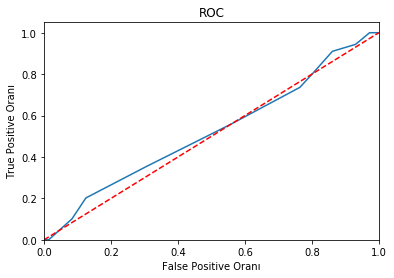

In [92]:
logit_roc_auc = roc_auc_score(y_test, knn_tuned.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, knn_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Burada önemli olan AUC(area under curve) dediğimiz çizdirdiğimiz çizginin altında kalan alanın büyüklüğüdür. Söz konusu alan 1'e ne kadar yakınsa model o kadar başarılı sayılır.

In [93]:
AUC = metrics.auc(fpr, tpr)
AUC = AUC * 100
AUC

52.09893882646692

Diğer başarı metrikleri gibi bunu da yüzdelik biçime çevirdik.

Tek bir defa başarı skoruna bakmak, model hakkında karar vermek için çok erken ve yanıltıcıdır. Modeli defalarca farklı test ve eğitim olacak şekilde kombinleyerek skorlamak daha sağlıklı olacaktır.

In [94]:
cross_val_score(knn_tuned, X_test, y_test, cv = 10)

array([0.65384615, 0.69230769, 0.72      , 0.64      , 0.72      ,
       0.76      , 0.76      , 0.6       , 0.70833333, 0.75      ])

Modeli 10 defa skorladık, bunların ortalamasını alarak daha kesin bir sonuç elde edebiliriz.

In [95]:
CrossValScore = cross_val_score(knn_tuned, X_test, y_test, cv = 10).mean()
CrossValScore = CrossValScore * 100
CrossValScore

70.04487179487178

In [96]:
PrecisionScore = metrics.precision_score(y_test, y_pred, average='weighted')
PrecisionScore = PrecisionScore * 100
PrecisionScore

62.56978021978023

In [97]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore = RecallScore * 100
RecallScore

68.8

In [98]:
F1Score = f1_score(y_test, y_pred, average='weighted')  
F1Score = F1Score * 100
F1Score

63.26262564727383

In [99]:
ROC_AUC_Score = roc_auc_score(y_test, y_pred)
ROC_AUC_Score = ROC_AUC_Score * 100
ROC_AUC_Score

52.45006242197253

10 kez katlamalı çapraz doğrulama skorlarının ortalaması 0 ile 1 arasında bir olasılık değeridir. 100 ile çarptığımızda yüzdelik olarak almış oluruz.

In [100]:
LogLoss = log_loss(y_test, y_pred)
LogLoss

10.776296535374822

In [101]:
BrierScore = brier_score_loss(y_test, y_pred)
BrierScore = 100 - BrierScore
BrierScore

99.688

In [102]:
BalancedAccuracyScore = balanced_accuracy_score(y_test, y_pred)
BalancedAccuracyScore = BalancedAccuracyScore * 100
BalancedAccuracyScore

52.45006242197253

In [103]:
JaccardScore = jaccard_score(y_test, y_pred)
JaccardScore = JaccardScore * 100
JaccardScore

67.5

In [104]:
sonuc = pd.DataFrame([["K Nearest Neighbors", ConfusionMatrixScore, CrossValScore, ROC_AUC_Score, AUC, RecallScore, F1Score, PrecisionScore, JaccardScore, BrierScore, BalancedAccuracyScore, LogLoss]], columns= ["Model", "ConfusionMatrixScore", "CrossValScore", "ROC_AUC_Score", "AUC", "RecallScore", "F1Score", "PrecisionScore", "JaccardScore","BrierScore","BalancedAccuracyScore", "LogLoss"])
sonuclar = sonuclar.append(sonuc)

## Support Vector Classifier Modeli İnşası ve Eğitimi

In [115]:
svc = SVC()

In [116]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [117]:
svc_params = {"C" : [0.001, 0.1, 1, 1.5, 2.2,3],
             "degree" : np.arange(1,4),
             "kernel" : ["linear","rbf"],
             "gamma" : [0.00001,0.0001, 0.001]}

In [118]:
svc_cv_model = GridSearchCV(svc,
                            svc_params,
                            cv = 10,
                            n_jobs = -1,
                            verbose = 2 )

In [122]:
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 23.8min


KeyboardInterrupt: 

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))
print("En iyi skor: " + str(svc_cv_model.best_score_))

In [ ]:
svc_tuned = SVC(kernel = "linear", C = 0.1, degree = 1, gamma =1e-05 ).fit(X_train, y_train)

## Support Vector Classifier Modeli Tahminleri ve Başarı Metrikleri

In [90]:
y_pred = svc_tuned.predict(X_test)

Bu sayede tahmin değerleri ile gerçek değerleri gözlemleyebileceğimiz karmaşıklık matrisini çizdirebiliriz. 

In [91]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[224   3]
 [ 16 222]]


Karmaşıklık matrisi ile modelin doğru ve yanlış tahminlerini mukayese edebiliriz. Sol üst ve sağ alt doğru tahmin çıktıları iken, diğer köşegen yanlış tahmin çıktılarıdır. Aşağıda yapılan işlemler sonucu modelin karmaşıklık matris için başarı skoru yüzdelik bazda görüntülenmektedir.

In [92]:
ConfusionMatrixScore = (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1])
ConfusionMatrixScore  = ConfusionMatrixScore * 100
ConfusionMatrixScore

95.91397849462365

Hazır fonksiyon olan "accuracy_score()" ile de aynı çıktıyı alırsak skorun sağlamasını yapmış olacağız.

In [93]:
accuracy_score(y_test, y_pred)

0.9591397849462365

Öte yandan sınıflandırma raporu olarak da bilinen "classification_report()" fonksiyonu bize model hakkında pek çok ayrıntılı bilgiyi detaylı olarak sunar. Modelin başarı durumunu özetleyen, doğruluk, duyarlılık, destek, ağırlıklı ortalama, F istatistikleri gibi pek çok başarı metriğine sınıflandırma raporunu kullanarak erişebiliriz.

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       227
           1       0.99      0.93      0.96       238

    accuracy                           0.96       465
   macro avg       0.96      0.96      0.96       465
weighted avg       0.96      0.96      0.96       465



Sınıflandırma algoritmalarında kullanılan pek çok başarı metriği bazı durumlarda yanıltıcı olabilmektedir. Bu gibi durumlar için ROC - AUC grafiği çizdirilir ve ROC eğrisinin(mavi çizgi) altında kalan alanın büyüklüğü modelin doğruluğu hakkında bize fikir verir. Kırmızı kesikli çizgi ise modelin başarısının %50 olduğu durumu temsil eder. 

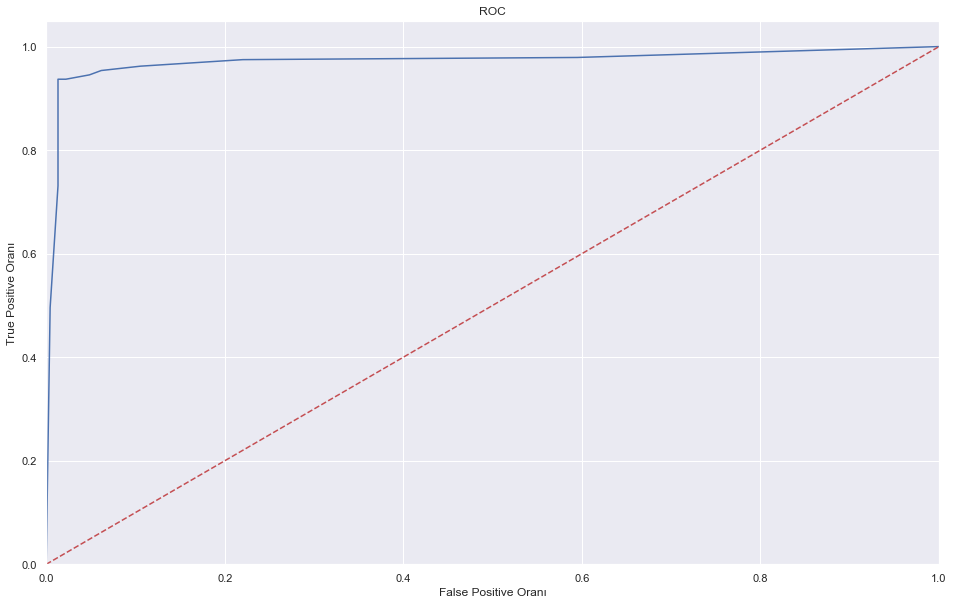

In [95]:
logit_roc_auc = roc_auc_score(y_test, svc_tuned.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, svc_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Burada önemli olan AUC(area under curve) dediğimiz çizdirdiğimiz çizginin altında kalan alanın büyüklüğüdür. Söz konusu alan 1'e ne kadar yakınsa model o kadar başarılı sayılır.

In [96]:
AUC = metrics.auc(fpr, tpr)
AUC = AUC * 100
AUC

97.2133787435679

Diğer başarı metrikleri gibi bunu da yüzdelik biçime çevirdik.

Tek bir defa başarı skoruna bakmak, model hakkında karar vermek için çok erken ve yanıltıcıdır. Modeli defalarca farklı test ve eğitim olacak şekilde kombinleyerek skorlamak daha sağlıklı olacaktır.

In [97]:
cross_val_score(svc_tuned, X_test, y_test, cv = 10)

array([0.93617021, 0.9787234 , 0.91489362, 1.        , 0.9787234 ,
       0.95744681, 0.93617021, 0.95652174, 0.86666667, 0.97777778])

Modeli 10 defa skorladık, bunların ortalamasını alarak daha kesin bir sonuç elde edebiliriz.

In [98]:
CrossValScore = cross_val_score(svc_tuned, X_test, y_test, cv = 10).mean()
CrossValScore = CrossValScore * 100
CrossValScore

95.03093843149347

In [100]:
PrecisionScore = metrics.precision_score(y_test, y_pred, average='weighted')
PrecisionScore = PrecisionScore * 100
PrecisionScore

96.063082437276

In [101]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore = RecallScore * 100
RecallScore

95.91397849462365

In [102]:
F1Score = f1_score(y_test, y_pred, average='weighted')  
F1Score = F1Score * 100
F1Score

95.91348716140838

In [103]:
ROC_AUC_Score = roc_auc_score(y_test, y_pred)
ROC_AUC_Score = ROC_AUC_Score * 100
ROC_AUC_Score

95.97786251064302

10 kez katlamalı çapraz doğrulama skorlarının ortalaması 0 ile 1 arasında bir olasılık değeridir. 100 ile çarptığımızda yüzdelik olarak almış oluruz.

In [104]:
LogLoss = log_loss(y_test, y_pred)
LogLoss

1.4112669898829975

In [105]:
BrierScore = brier_score_loss(y_test, y_pred)
BrierScore = 100 - BrierScore
BrierScore

99.95913978494623

In [106]:
BalancedAccuracyScore = balanced_accuracy_score(y_test, y_pred)
BalancedAccuracyScore = BalancedAccuracyScore * 100
BalancedAccuracyScore

95.97786251064302

In [107]:
JaccardScore = jaccard_score(y_test, y_pred)
JaccardScore = JaccardScore * 100
JaccardScore

92.11618257261411

In [108]:
sonuc = pd.DataFrame([["Support Vector Classifier", ConfusionMatrixScore, CrossValScore, ROC_AUC_Score, AUC, RecallScore, F1Score, PrecisionScore, JaccardScore, BrierScore, BalancedAccuracyScore, LogLoss]], columns= ["Model", "ConfusionMatrixScore", "CrossValScore", "ROC_AUC_Score", "AUC", "RecallScore", "F1Score", "PrecisionScore", "JaccardScore","BrierScore","BalancedAccuracyScore", "LogLoss"])
sonuclar = sonuclar.append(sonuc)

## CART (Classification And Regression Trees) Modeli İnşası ve Eğitimi

In [105]:
cart = tree.DecisionTreeClassifier()

In [106]:
cart

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [107]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split":list(range(2,50))}

In [108]:
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)

In [109]:
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 3244 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   30.8s finished


In [110]:
print("En iyi parametreler : "+str(cart_cv_model.best_params_))
print("En iyi skor : "+str(cart_cv_model.best_score_))

En iyi parametreler : {'max_depth': 5, 'min_samples_split': 12}
En iyi skor : 0.708


In [111]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 12)

In [112]:
cart_tuned = cart.fit(X_train, y_train)

## CART Modeli Tahminleri ve Başarı Metrikleri 

In [113]:
y_pred = cart_tuned.predict(X_test)

Bu sayede tahmin değerleri ile gerçek değerleri gözlemleyebileceğimiz karmaşıklık matrisini çizdirebiliriz. 

In [114]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[  6  66]
 [ 11 167]]


Karmaşıklık matrisi ile modelin doğru ve yanlış tahminlerini mukayese edebiliriz. Sol üst ve sağ alt doğru tahmin çıktıları iken, diğer köşegen yanlış tahmin çıktılarıdır. Aşağıda yapılan işlemler sonucu modelin karmaşıklık matris için başarı skoru yüzdelik bazda görüntülenmektedir.

In [115]:
ConfusionMatrixScore = (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1])
ConfusionMatrixScore  = ConfusionMatrixScore*100
ConfusionMatrixScore

69.19999999999999

Hazır fonksiyon olan "accuracy_score()" ile de aynı çıktıyı alırsak skorun sağlamasını yapmış olacağız.

In [116]:
accuracy_score(y_test, y_pred)

0.692

Öte yandan sınıflandırma raporu olarak da bilinen "classification_report()" fonksiyonu bize model hakkında pek çok ayrıntılı bilgiyi detaylı olarak sunar. Modelin başarı durumunu özetleyen, doğruluk, duyarlılık, destek, ağırlıklı ortalama, F istatistikleri gibi pek çok başarı metriğine sınıflandırma raporunu kullanarak erişebiliriz.

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.08      0.13        72
           1       0.72      0.94      0.81       178

    accuracy                           0.69       250
   macro avg       0.53      0.51      0.47       250
weighted avg       0.61      0.69      0.62       250



Sınıflandırma algoritmalarında kullanılan pek çok başarı metriği bazı durumlarda yanıltıcı olabilmektedir. Bu gibi durumlar için ROC - AUC grafiği çizdirilir ve ROC eğrisinin(mavi çizgi) altında kalan alanın büyüklüğü modelin doğruluğu hakkında bize fikir verir. Kırmızı kesikli çizgi ise modelin başarısının %50 olduğu durumu temsil eder. 

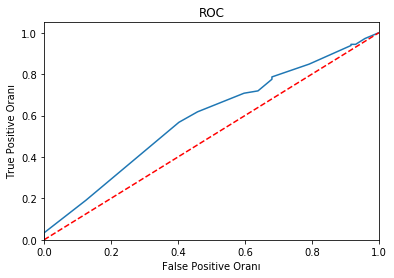

In [118]:
logit_roc_auc = roc_auc_score(y_test, cart_tuned.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, cart_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Burada önemli olan AUC(area under curve) dediğimiz çizdirdiğimiz çizginin altında kalan alanın büyüklüğüdür. Söz konusu alan 1'e ne kadar yakınsa model o kadar başarılı sayılır.

In [119]:
AUC = metrics.auc(fpr, tpr)
AUC = AUC * 100
AUC

58.852215980024965

Diğer başarı metrikleri gibi bunu da yüzdelik biçime çevirdik.

Tek bir defa başarı skoruna bakmak, model hakkında karar vermek için çok erken ve yanıltıcıdır. Modeli defalarca farklı test ve eğitim olacak şekilde kombinleyerek skorlamak daha sağlıklı olacaktır.

In [120]:
cross_val_score(cart_tuned, X_test, y_test, cv = 10)

array([0.69230769, 0.69230769, 0.76      , 0.64      , 0.72      ,
       0.72      , 0.72      , 0.72      , 0.75      , 0.625     ])

Modeli 10 defa skorladık, bunların ortalamasını alarak daha kesin bir sonuç elde edebiliriz.

In [121]:
CrossValScore = cross_val_score(cart_tuned, X_test, y_test, cv = 10).mean()
CrossValScore = CrossValScore * 100
CrossValScore

70.39615384615384

In [122]:
PrecisionScore = metrics.precision_score(y_test, y_pred, average='weighted')
PrecisionScore = PrecisionScore * 100
PrecisionScore

61.19646553900531

In [123]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore = RecallScore * 100
RecallScore

69.19999999999999

In [124]:
F1Score = f1_score(y_test, y_pred, average='weighted')  
F1Score = F1Score * 100
F1Score

61.74397331802399

In [125]:
ROC_AUC_Score = roc_auc_score(y_test, y_pred)
ROC_AUC_Score = ROC_AUC_Score * 100
ROC_AUC_Score

51.07677902621723

10 kez katlamalı çapraz doğrulama skorlarının ortalaması 0 ile 1 arasında bir olasılık değeridir. 100 ile çarptığımızda yüzdelik olarak almış oluruz.

In [126]:
LogLoss = log_loss(y_test, y_pred)
LogLoss

10.63815422335406

In [127]:
BrierScore = brier_score_loss(y_test, y_pred)
BrierScore = 100 - BrierScore
BrierScore

99.692

In [128]:
BalancedAccuracyScore = balanced_accuracy_score(y_test, y_pred)
BalancedAccuracyScore = BalancedAccuracyScore * 100
BalancedAccuracyScore

51.076779026217224

In [129]:
JaccardScore = jaccard_score(y_test, y_pred)
JaccardScore = JaccardScore * 100
JaccardScore

68.44262295081968

In [130]:
sonuc = pd.DataFrame([["CART", ConfusionMatrixScore, CrossValScore, ROC_AUC_Score, AUC, RecallScore, F1Score, PrecisionScore, JaccardScore, BrierScore, BalancedAccuracyScore, LogLoss]], columns= ["Model", "ConfusionMatrixScore", "CrossValScore", "ROC_AUC_Score", "AUC", "RecallScore", "F1Score", "PrecisionScore", "JaccardScore","BrierScore","BalancedAccuracyScore", "LogLoss"])
sonuclar = sonuclar.append(sonuc)

## Random Forest Modeli İnşası ve Eğitimi

In [131]:
rf_model = RandomForestClassifier()

In [132]:
rf_params = {"max_depth": [1,2,5],
            "max_features":[1,2,3,4],
            "n_estimators":[200,250,300,400],
            "min_samples_split":[2,3,4]}

In [133]:
rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv = 10,
                          n_jobs = -1,
                          verbose = 2)

In [134]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.9s


KeyboardInterrupt: 

In [ ]:
print("En iyi parametreler : " + str(rf_cv_model.best_params_))
print("En iyi skor : " + str(rf_cv_model.best_score_))

In [253]:
rf_tuned = RandomForestClassifier(max_depth = 1,
                                 max_features = 2,
                                 min_samples_split = 3,
                                 n_estimators = 200)

In [254]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Random Forest Modeli Tahminleri ve Başarı Metrikleri 

In [255]:
y_pred = rf_tuned.predict(X_test)

Bu sayede tahmin değerleri ile gerçek değerleri gözlemleyebileceğimiz karmaşıklık matrisini çizdirebiliriz. 

In [256]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[220   7]
 [ 14 224]]


Karmaşıklık matrisi ile modelin doğru ve yanlış tahminlerini mukayese edebiliriz. Sol üst ve sağ alt doğru tahmin çıktıları iken, diğer köşegen yanlış tahmin çıktılarıdır. Aşağıda yapılan işlemler sonucu modelin karmaşıklık matris için başarı skoru yüzdelik bazda görüntülenmektedir.

In [257]:
ConfusionMatrixScore = (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1])
ConfusionMatrixScore  = ConfusionMatrixScore*100
ConfusionMatrixScore

95.48387096774194

Hazır fonksiyon olan "accuracy_score()" ile de aynı çıktıyı alırsak skorun sağlamasını yapmış olacağız.

In [259]:
accuracy_score(y_test, y_pred)

0.9548387096774194

Öte yandan sınıflandırma raporu olarak da bilinen "classification_report()" fonksiyonu bize model hakkında pek çok ayrıntılı bilgiyi detaylı olarak sunar. Modelin başarı durumunu özetleyen, doğruluk, duyarlılık, destek, ağırlıklı ortalama, F istatistikleri gibi pek çok başarı metriğine sınıflandırma raporunu kullanarak erişebiliriz.

In [260]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       227
           1       0.97      0.94      0.96       238

    accuracy                           0.95       465
   macro avg       0.95      0.96      0.95       465
weighted avg       0.96      0.95      0.95       465



Sınıflandırma algoritmalarında kullanılan pek çok başarı metriği bazı durumlarda yanıltıcı olabilmektedir. Bu gibi durumlar için ROC - AUC grafiği çizdirilir ve ROC eğrisinin(mavi çizgi) altında kalan alanın büyüklüğü modelin doğruluğu hakkında bize fikir verir. Kırmızı kesikli çizgi ise modelin başarısının %50 olduğu durumu temsil eder. 

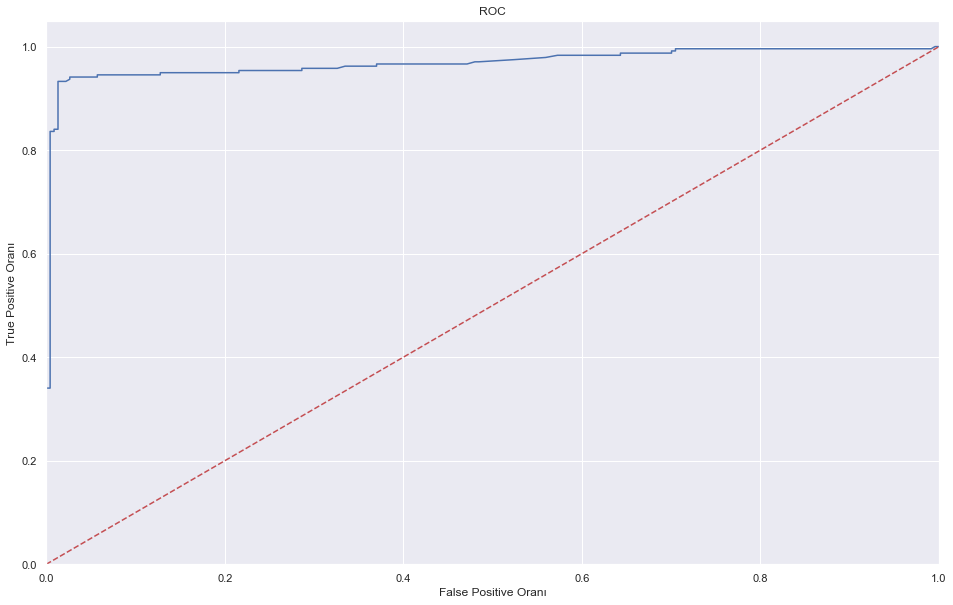

In [261]:
logit_roc_auc = roc_auc_score(y_test, rf_tuned.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, rf_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Burada önemli olan AUC(area under curve) dediğimiz çizdirdiğimiz çizginin altında kalan alanın büyüklüğüdür. Söz konusu alan 1'e ne kadar yakınsa model o kadar başarılı sayılır.

In [262]:
AUC = metrics.auc(fpr, tpr)
AUC = AUC * 100
AUC

96.89593899233702

Diğer başarı metrikleri gibi bunu da yüzdelik biçime çevirdik.

Tek bir defa başarı skoruna bakmak, model hakkında karar vermek için çok erken ve yanıltıcıdır. Modeli defalarca farklı test ve eğitim olacak şekilde kombinleyerek skorlamak daha sağlıklı olacaktır.

In [263]:
cross_val_score(rf_tuned, X_test, y_test, cv = 10)

array([0.89361702, 0.95744681, 0.91489362, 0.9787234 , 0.9787234 ,
       0.89361702, 0.91489362, 0.97826087, 0.86666667, 0.97777778])

Modeli 10 defa skorladık, bunların ortalamasını alarak daha kesin bir sonuç elde edebiliriz.

In [264]:
CrossValScore = cross_val_score(rf_tuned, X_test, y_test, cv = 10).mean()
CrossValScore = CrossValScore * 100
CrossValScore

93.74971733991163

In [265]:
PrecisionScore = metrics.precision_score(y_test, y_pred, average='weighted')
PrecisionScore = PrecisionScore * 100
PrecisionScore

95.52831875412521

In [266]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore = RecallScore * 100
RecallScore

95.48387096774194

In [267]:
F1Score = f1_score(y_test, y_pred, average='weighted')  
F1Score = F1Score * 100
F1Score

95.48445582597127

In [268]:
ROC_AUC_Score = roc_auc_score(y_test, y_pred)
ROC_AUC_Score = ROC_AUC_Score * 100
ROC_AUC_Score

95.51697330914745

10 kez katlamalı çapraz doğrulama skorlarının ortalaması 0 ile 1 arasında bir olasılık değeridir. 100 ile çarptığımızda yüzdelik olarak almış oluruz.

In [269]:
LogLoss = log_loss(y_test, y_pred)
LogLoss

1.5598277451078193

In [270]:
BrierScore = brier_score_loss(y_test, y_pred)
BrierScore = 100 - BrierScore
BrierScore

99.95483870967742

In [271]:
BalancedAccuracyScore = balanced_accuracy_score(y_test, y_pred)
BalancedAccuracyScore = BalancedAccuracyScore * 100
BalancedAccuracyScore

95.51697330914745

In [272]:
JaccardScore = jaccard_score(y_test, y_pred)
JaccardScore = JaccardScore * 100
JaccardScore

91.42857142857143

In [273]:
sonuc = pd.DataFrame([["Random Forest", ConfusionMatrixScore, CrossValScore, ROC_AUC_Score, AUC, RecallScore, F1Score, PrecisionScore, JaccardScore, BrierScore, BalancedAccuracyScore, LogLoss]], columns= ["Model", "ConfusionMatrixScore", "CrossValScore", "ROC_AUC_Score", "AUC", "RecallScore", "F1Score", "PrecisionScore", "JaccardScore","BrierScore","BalancedAccuracyScore", "LogLoss"])
sonuclar = sonuclar.append(sonuc)

Random Forest modellememiz diğer algoritmalara göre daha iyi sonuç vermiş gözüküyor. Bu başarılı modellemeye göre özniteliklerin önemlendirilme sıralamasına göz atabiliriz.

en iyi başarıyı veren modele feature importance uygula ve ayıkla bakalım. 

# Gradient Boosting Modelleme ve Başarı Analizi

In [180]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7241379310344828

In [180]:
gbm = GradientBoostingClassifier()

0.7241379310344828

Hiçbir parametre optimizasyonu yapmadığımızda modellemenin verdiği skoru görüntüledik. Bazı parametrelere belirlediğimiz aralıklarda değerler vererek optimizasyon yaparak modellemeyi kurup eğiteceğiz.

In [181]:
gbm_params = {"learning_rate" : [0.001,0.01,0.1],
             "n_estimators" : [100,500],
             "max_depth" : [3,5,10],
             "min_samples_split": [5,7,10,13,15]}

In [182]:
gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [183]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 215 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 701 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...nge=None,
                                                  presort='

In [184]:
print("En iyi parametreler : " + str(gbm_cv.best_params_))
print("En iyi skor : " + str(gbm_cv.best_score_))

En iyi parametreler : {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 13, 'n_estimators': 500}
En iyi skor : 0.7471264367816092


In [185]:
gbm = GradientBoostingClassifier(learning_rate = 0.1,
                                max_depth = 10,
                                min_samples_split = 13,
                                n_estimators = 500)

In [ ]:
gbm_tuned = gbm.fit(X_train, y_train)

## Gradient Boosting Modeli Tahminleri ve Başarı Metrikleri 

In [90]:
y_pred = gbm_tuned.predict(X_test)

Bu sayede tahmin değerleri ile gerçek değerleri gözlemleyebileceğimiz karmaşıklık matrisini çizdirebiliriz. 

In [91]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[224   3]
 [ 16 222]]


Karmaşıklık matrisi ile modelin doğru ve yanlış tahminlerini mukayese edebiliriz. Sol üst ve sağ alt doğru tahmin çıktıları iken, diğer köşegen yanlış tahmin çıktılarıdır. Aşağıda yapılan işlemler sonucu modelin karmaşıklık matris için başarı skoru yüzdelik bazda görüntülenmektedir.

In [92]:
ConfusionMatrixScore = (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1])
ConfusionMatrixScore  = ConfusionMatrixScore*100
ConfusionMatrixScore

95.91397849462365

Hazır fonksiyon olan "accuracy_score()" ile de aynı çıktıyı alırsak skorun sağlamasını yapmış olacağız.

In [93]:
accuracy_score(y_test, y_pred)

0.9591397849462365

Öte yandan sınıflandırma raporu olarak da bilinen "classification_report()" fonksiyonu bize model hakkında pek çok ayrıntılı bilgiyi detaylı olarak sunar. Modelin başarı durumunu özetleyen, doğruluk, duyarlılık, destek, ağırlıklı ortalama, F istatistikleri gibi pek çok başarı metriğine sınıflandırma raporunu kullanarak erişebiliriz.

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       227
           1       0.99      0.93      0.96       238

    accuracy                           0.96       465
   macro avg       0.96      0.96      0.96       465
weighted avg       0.96      0.96      0.96       465



Sınıflandırma algoritmalarında kullanılan pek çok başarı metriği bazı durumlarda yanıltıcı olabilmektedir. Bu gibi durumlar için ROC - AUC grafiği çizdirilir ve ROC eğrisinin(mavi çizgi) altında kalan alanın büyüklüğü modelin doğruluğu hakkında bize fikir verir. Kırmızı kesikli çizgi ise modelin başarısının %50 olduğu durumu temsil eder. 

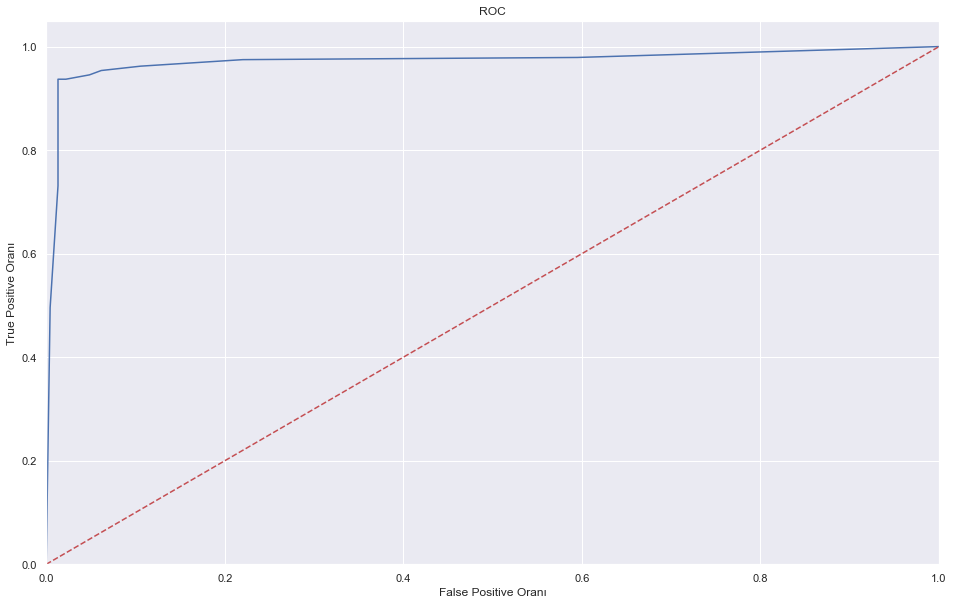

In [95]:
logit_roc_auc = roc_auc_score(y_test, gbm_tuned.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, gbm_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Burada önemli olan AUC(area under curve) dediğimiz çizdirdiğimiz çizginin altında kalan alanın büyüklüğüdür. Söz konusu alan 1'e ne kadar yakınsa model o kadar başarılı sayılır.

In [96]:
AUC = metrics.auc(fpr, tpr)
AUC = AUC * 100
AUC

97.2133787435679

Diğer başarı metrikleri gibi bunu da yüzdelik biçime çevirdik.

Tek bir defa başarı skoruna bakmak, model hakkında karar vermek için çok erken ve yanıltıcıdır. Modeli defalarca farklı test ve eğitim olacak şekilde kombinleyerek skorlamak daha sağlıklı olacaktır.

In [97]:
cross_val_score(gbm_tuned, X_test, y_test, cv = 10)

array([0.93617021, 0.9787234 , 0.91489362, 1.        , 0.9787234 ,
       0.95744681, 0.93617021, 0.95652174, 0.86666667, 0.97777778])

Modeli 10 defa skorladık, bunların ortalamasını alarak daha kesin bir sonuç elde edebiliriz.

In [98]:
CrossValScore = cross_val_score(gbm_tuned, X_test, y_test, cv = 10).mean()
CrossValScore = CrossValScore * 100
CrossValScore

95.03093843149347

In [100]:
PrecisionScore = metrics.precision_score(y_test, y_pred, average='weighted')
PrecisionScore = PrecisionScore * 100
PrecisionScore

96.063082437276

In [101]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore = RecallScore * 100
RecallScore

95.91397849462365

In [102]:
F1Score = f1_score(y_test, y_pred, average='weighted')  
F1Score = F1Score * 100
F1Score

95.91348716140838

In [103]:
ROC_AUC_Score = roc_auc_score(y_test, y_pred)
ROC_AUC_Score = ROC_AUC_Score * 100
ROC_AUC_Score

95.97786251064302

10 kez katlamalı çapraz doğrulama skorlarının ortalaması 0 ile 1 arasında bir olasılık değeridir. 100 ile çarptığımızda yüzdelik olarak almış oluruz.

In [104]:
LogLoss = log_loss(y_test, y_pred)
LogLoss

1.4112669898829975

In [105]:
BrierScore = brier_score_loss(y_test, y_pred)
BrierScore = 100 - BrierScore
BrierScore

99.95913978494623

In [106]:
BalancedAccuracyScore = balanced_accuracy_score(y_test, y_pred)
BalancedAccuracyScore = BalancedAccuracyScore * 100
BalancedAccuracyScore

95.97786251064302

In [107]:
JaccardScore = jaccard_score(y_test, y_pred)
JaccardScore = JaccardScore * 100
JaccardScore

92.11618257261411

In [108]:
sonuc = pd.DataFrame([["Gradient Boosting Modeli", ConfusionMatrixScore, CrossValScore, ROC_AUC_Score, AUC, RecallScore, F1Score, PrecisionScore, JaccardScore, BrierScore, BalancedAccuracyScore, LogLoss]], columns= ["Model", "ConfusionMatrixScore", "CrossValScore", "ROC_AUC_Score", "AUC", "RecallScore", "F1Score", "PrecisionScore", "JaccardScore","BrierScore","BalancedAccuracyScore", "LogLoss"])
sonuclar = sonuclar.append(sonuc)

## X Gradient Boosting Modelleme ve Başarı Analizi

In [ ]:
xgb = XGBClassifier()

In [193]:
xgb_params = {
    "n_estimators" : [100, 500, 1000],
    "subsample" : [0.6, 0.8, 1.0],
    "max_depth" : [3,4,6],
    "learning_rate":[0.01, 0.1, 0.05],
    "min_samples_split":[2, 5, 100]
}

In [194]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs = -1, verbose =2)

In [195]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 436 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 842 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 1408 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 2138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  1.2min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [3, 4, 6],
                         'min_samples_split': [2, 5, 100],

In [196]:
print("En iyi parametreler: " + str(xgb_cv_model.best_params_))
print("En iyi skor: " + str(xgb_cv_model.best_score_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
En iyi skor: 0.7011494252873564


In [197]:
xgb = XGBClassifier(learning_rate = 0.1,
                   max_depth = 3,
                   min_samples_split = 2,
                   n_estimators = 100,
                   subsample = 0.8)

In [198]:
xgb_tuned = xgb.fit(X_train, y_train)

## X Gradient Boosting Modeli Tahminleri ve Başarı Metrikleri 

In [90]:
y_pred = xgb_tuned.predict(X_test)

Bu sayede tahmin değerleri ile gerçek değerleri gözlemleyebileceğimiz karmaşıklık matrisini çizdirebiliriz. 

In [91]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[224   3]
 [ 16 222]]


Karmaşıklık matrisi ile modelin doğru ve yanlış tahminlerini mukayese edebiliriz. Sol üst ve sağ alt doğru tahmin çıktıları iken, diğer köşegen yanlış tahmin çıktılarıdır. Aşağıda yapılan işlemler sonucu modelin karmaşıklık matris için başarı skoru yüzdelik bazda görüntülenmektedir.

In [92]:
ConfusionMatrixScore = (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1])
ConfusionMatrixScore  = ConfusionMatrixScore*100
ConfusionMatrixScore

95.91397849462365

Hazır fonksiyon olan "accuracy_score()" ile de aynı çıktıyı alırsak skorun sağlamasını yapmış olacağız.

In [93]:
accuracy_score(y_test, y_pred)

0.9591397849462365

Öte yandan sınıflandırma raporu olarak da bilinen "classification_report()" fonksiyonu bize model hakkında pek çok ayrıntılı bilgiyi detaylı olarak sunar. Modelin başarı durumunu özetleyen, doğruluk, duyarlılık, destek, ağırlıklı ortalama, F istatistikleri gibi pek çok başarı metriğine sınıflandırma raporunu kullanarak erişebiliriz.

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       227
           1       0.99      0.93      0.96       238

    accuracy                           0.96       465
   macro avg       0.96      0.96      0.96       465
weighted avg       0.96      0.96      0.96       465



Sınıflandırma algoritmalarında kullanılan pek çok başarı metriği bazı durumlarda yanıltıcı olabilmektedir. Bu gibi durumlar için ROC - AUC grafiği çizdirilir ve ROC eğrisinin(mavi çizgi) altında kalan alanın büyüklüğü modelin doğruluğu hakkında bize fikir verir. Kırmızı kesikli çizgi ise modelin başarısının %50 olduğu durumu temsil eder. 

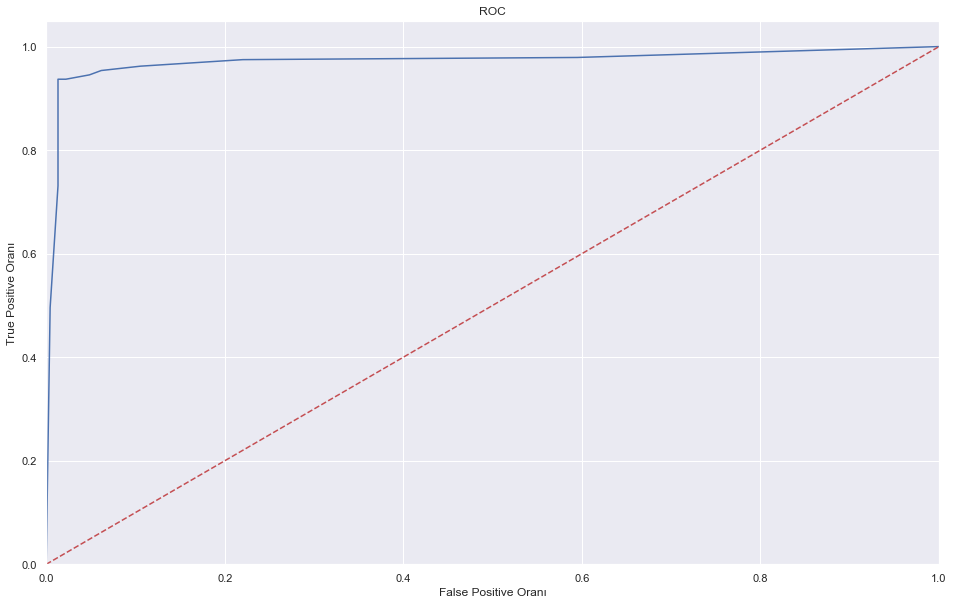

In [95]:
logit_roc_auc = roc_auc_score(y_test, xgb_tuned.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, xgb_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Burada önemli olan AUC(area under curve) dediğimiz çizdirdiğimiz çizginin altında kalan alanın büyüklüğüdür. Söz konusu alan 1'e ne kadar yakınsa model o kadar başarılı sayılır.

In [96]:
AUC = metrics.auc(fpr, tpr)
AUC = AUC * 100
AUC

97.2133787435679

Diğer başarı metrikleri gibi bunu da yüzdelik biçime çevirdik.

Tek bir defa başarı skoruna bakmak, model hakkında karar vermek için çok erken ve yanıltıcıdır. Modeli defalarca farklı test ve eğitim olacak şekilde kombinleyerek skorlamak daha sağlıklı olacaktır.

In [97]:
cross_val_score(xgb_tuned, X_test, y_test, cv = 10)

array([0.93617021, 0.9787234 , 0.91489362, 1.        , 0.9787234 ,
       0.95744681, 0.93617021, 0.95652174, 0.86666667, 0.97777778])

Modeli 10 defa skorladık, bunların ortalamasını alarak daha kesin bir sonuç elde edebiliriz.

In [98]:
CrossValScore = cross_val_score(xgb_tuned, X_test, y_test, cv = 10).mean()
CrossValScore = CrossValScore * 100
CrossValScore

95.03093843149347

In [100]:
PrecisionScore = metrics.precision_score(y_test, y_pred, average='weighted')
PrecisionScore = PrecisionScore * 100
PrecisionScore

96.063082437276

In [101]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore = RecallScore * 100
RecallScore

95.91397849462365

In [102]:
F1Score = f1_score(y_test, y_pred, average='weighted')  
F1Score = F1Score * 100
F1Score

95.91348716140838

In [103]:
ROC_AUC_Score = roc_auc_score(y_test, y_pred)
ROC_AUC_Score = ROC_AUC_Score * 100
ROC_AUC_Score

95.97786251064302

10 kez katlamalı çapraz doğrulama skorlarının ortalaması 0 ile 1 arasında bir olasılık değeridir. 100 ile çarptığımızda yüzdelik olarak almış oluruz.

In [104]:
LogLoss = log_loss(y_test, y_pred)
LogLoss

1.4112669898829975

In [105]:
BrierScore = brier_score_loss(y_test, y_pred)
BrierScore = 100 - BrierScore
BrierScore

99.95913978494623

In [106]:
BalancedAccuracyScore = balanced_accuracy_score(y_test, y_pred)
BalancedAccuracyScore = BalancedAccuracyScore * 100
BalancedAccuracyScore

95.97786251064302

In [107]:
JaccardScore = jaccard_score(y_test, y_pred)
JaccardScore = JaccardScore * 100
JaccardScore

92.11618257261411

In [108]:
sonuc = pd.DataFrame([["XGB", ConfusionMatrixScore, CrossValScore, ROC_AUC_Score, AUC, RecallScore, F1Score, PrecisionScore, JaccardScore, BrierScore, BalancedAccuracyScore, LogLoss]], columns= ["Model", "ConfusionMatrixScore", "CrossValScore", "ROC_AUC_Score", "AUC", "RecallScore", "F1Score", "PrecisionScore", "JaccardScore","BrierScore","BalancedAccuracyScore", "LogLoss"])
sonuclar = sonuclar.append(sonuc)

## Light Gradient Boosting Modeli İnşası ve Eğitimi

In [124]:
lgbm = LGBMClassifier()

In [125]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Hiçbir parametre optimizasyonu yapmadığımızda modellemenin verdiği skoru görüntüledik. Bazı parametrelere belirlediğimiz aralıklarda değerler vererek optimizasyon yaparak modellemeyi kurup eğiteceğiz.

In [206]:
lgbm_params = {"n_estimators" : [100,500,2000],
              "subsample" : [0.6, 0.8, 1],
              "max_depth" : [3,4,5,6],
              "learning_rate" : [0.1, 0.001, 0.002, 0.05],
              "min_child_samples" : [5,10,20]}

In [207]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 10, n_jobs = -1, verbose = 2)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 1292 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 1806 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2251 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2852 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3463 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4305 out of 4320 | elapsed:  3.0min remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  3.0min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.001, 0.002, 0.05],
                

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [208]:
print("En iyi parametreler: " + str(lgbm_cv_model.best_params_))
print("En iyi skor: " + str(lgbm_cv_model.best_score_))

En iyi parametreler: {'learning_rate': 0.001, 'max_depth': 3, 'min_child_samples': 10, 'n_estimators': 500, 'subsample': 0.6}
En iyi skor: 0.735632183908046


In [209]:
lgbm = LGBMClassifier(learning_rate = 0.001,
                     max_depth = 3,
                     subsample = 0.6,
                     n_estimators = 500,
                     min_child_samples = 10)

In [210]:
lgbm_tuned = lgbm.fit(X_train, y_train)

## Light Gradient Boosting Modeli Tahminleri ve Başarı Metrikleri 

In [90]:
y_pred = lgbm_tuned.predict(X_test)

Bu sayede tahmin değerleri ile gerçek değerleri gözlemleyebileceğimiz karmaşıklık matrisini çizdirebiliriz. 

In [91]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[224   3]
 [ 16 222]]


Karmaşıklık matrisi ile modelin doğru ve yanlış tahminlerini mukayese edebiliriz. Sol üst ve sağ alt doğru tahmin çıktıları iken, diğer köşegen yanlış tahmin çıktılarıdır. Aşağıda yapılan işlemler sonucu modelin karmaşıklık matris için başarı skoru yüzdelik bazda görüntülenmektedir.

In [92]:
ConfusionMatrixScore = (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1])
ConfusionMatrixScore  = ConfusionMatrixScore*100
ConfusionMatrixScore

95.91397849462365

Hazır fonksiyon olan "accuracy_score()" ile de aynı çıktıyı alırsak skorun sağlamasını yapmış olacağız.

In [93]:
accuracy_score(y_test, y_pred)

0.9591397849462365

Öte yandan sınıflandırma raporu olarak da bilinen "classification_report()" fonksiyonu bize model hakkında pek çok ayrıntılı bilgiyi detaylı olarak sunar. Modelin başarı durumunu özetleyen, doğruluk, duyarlılık, destek, ağırlıklı ortalama, F istatistikleri gibi pek çok başarı metriğine sınıflandırma raporunu kullanarak erişebiliriz.

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       227
           1       0.99      0.93      0.96       238

    accuracy                           0.96       465
   macro avg       0.96      0.96      0.96       465
weighted avg       0.96      0.96      0.96       465



Sınıflandırma algoritmalarında kullanılan pek çok başarı metriği bazı durumlarda yanıltıcı olabilmektedir. Bu gibi durumlar için ROC - AUC grafiği çizdirilir ve ROC eğrisinin(mavi çizgi) altında kalan alanın büyüklüğü modelin doğruluğu hakkında bize fikir verir. Kırmızı kesikli çizgi ise modelin başarısının %50 olduğu durumu temsil eder. 

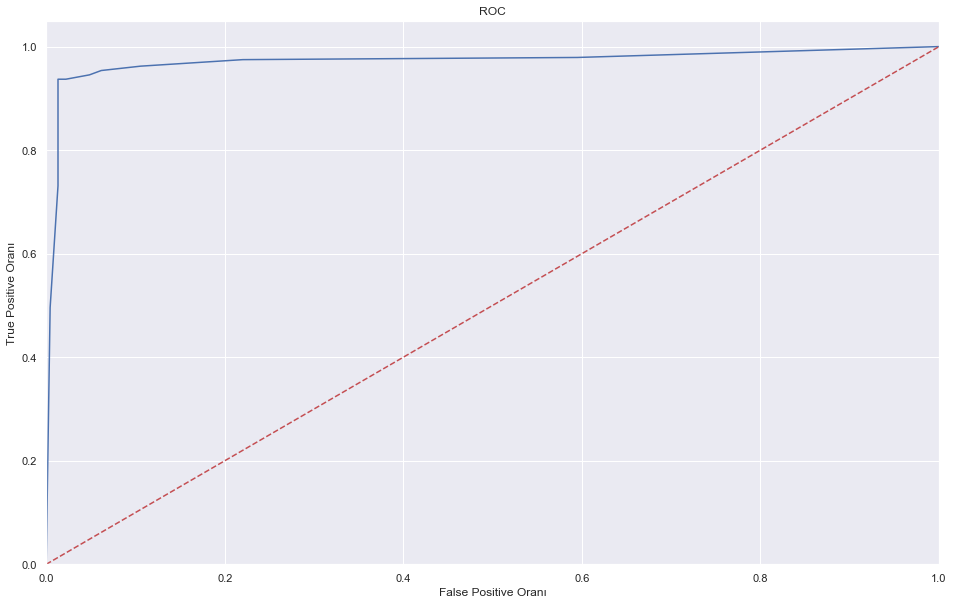

In [95]:
logit_roc_auc = roc_auc_score(y_test, lgbm_tuned.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, lgbm_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Burada önemli olan AUC(area under curve) dediğimiz çizdirdiğimiz çizginin altında kalan alanın büyüklüğüdür. Söz konusu alan 1'e ne kadar yakınsa model o kadar başarılı sayılır.

In [96]:
AUC = metrics.auc(fpr, tpr)
AUC = AUC * 100
AUC

97.2133787435679

Diğer başarı metrikleri gibi bunu da yüzdelik biçime çevirdik.

Tek bir defa başarı skoruna bakmak, model hakkında karar vermek için çok erken ve yanıltıcıdır. Modeli defalarca farklı test ve eğitim olacak şekilde kombinleyerek skorlamak daha sağlıklı olacaktır.

In [97]:
cross_val_score(lgbm_tuned, X_test, y_test, cv = 10)

array([0.93617021, 0.9787234 , 0.91489362, 1.        , 0.9787234 ,
       0.95744681, 0.93617021, 0.95652174, 0.86666667, 0.97777778])

Modeli 10 defa skorladık, bunların ortalamasını alarak daha kesin bir sonuç elde edebiliriz.

In [98]:
CrossValScore = cross_val_score(lgbm_tuned, X_test, y_test, cv = 10).mean()
CrossValScore = CrossValScore * 100
CrossValScore

95.03093843149347

In [100]:
PrecisionScore = metrics.precision_score(y_test, y_pred, average='weighted')
PrecisionScore = PrecisionScore * 100
PrecisionScore

96.063082437276

In [101]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore = RecallScore * 100
RecallScore

95.91397849462365

In [102]:
F1Score = f1_score(y_test, y_pred, average='weighted')  
F1Score = F1Score * 100
F1Score

95.91348716140838

In [103]:
ROC_AUC_Score = roc_auc_score(y_test, y_pred)
ROC_AUC_Score = ROC_AUC_Score * 100
ROC_AUC_Score

95.97786251064302

10 kez katlamalı çapraz doğrulama skorlarının ortalaması 0 ile 1 arasında bir olasılık değeridir. 100 ile çarptığımızda yüzdelik olarak almış oluruz.

In [104]:
LogLoss = log_loss(y_test, y_pred)
LogLoss

1.4112669898829975

In [105]:
BrierScore = brier_score_loss(y_test, y_pred)
BrierScore = 100 - BrierScore
BrierScore

99.95913978494623

In [106]:
BalancedAccuracyScore = balanced_accuracy_score(y_test, y_pred)
BalancedAccuracyScore = BalancedAccuracyScore * 100
BalancedAccuracyScore

95.97786251064302

In [107]:
JaccardScore = jaccard_score(y_test, y_pred)
JaccardScore = JaccardScore * 100
JaccardScore

92.11618257261411

In [108]:
sonuc = pd.DataFrame([["Light Gradient Boosting Modeli", ConfusionMatrixScore, CrossValScore, ROC_AUC_Score, AUC, RecallScore, F1Score, PrecisionScore, JaccardScore, BrierScore, BalancedAccuracyScore, LogLoss]], columns= ["Model", "ConfusionMatrixScore", "CrossValScore", "ROC_AUC_Score", "AUC", "RecallScore", "F1Score", "PrecisionScore", "JaccardScore","BrierScore","BalancedAccuracyScore", "LogLoss"])
sonuclar = sonuclar.append(sonuc)

## Light Gradient Boosting Modelleme ve Başarı Analizi

In [217]:
catb = CatBoostClassifier()

Learning rate set to 0.008395
0:	learn: 0.6888207	total: 181ms	remaining: 3m 1s
1:	learn: 0.6856759	total: 203ms	remaining: 1m 41s
2:	learn: 0.6833397	total: 217ms	remaining: 1m 12s
3:	learn: 0.6787534	total: 231ms	remaining: 57.6s
4:	learn: 0.6746299	total: 244ms	remaining: 48.6s
5:	learn: 0.6717705	total: 258ms	remaining: 42.7s
6:	learn: 0.6668122	total: 271ms	remaining: 38.4s
7:	learn: 0.6623830	total: 284ms	remaining: 35.2s
8:	learn: 0.6581907	total: 296ms	remaining: 32.6s
9:	learn: 0.6538022	total: 309ms	remaining: 30.6s
10:	learn: 0.6513929	total: 322ms	remaining: 29s
11:	learn: 0.6476674	total: 335ms	remaining: 27.5s
12:	learn: 0.6435583	total: 347ms	remaining: 26.3s
13:	learn: 0.6402031	total: 360ms	remaining: 25.3s
14:	learn: 0.6366692	total: 372ms	remaining: 24.4s
15:	learn: 0.6329127	total: 388ms	remaining: 23.9s
16:	learn: 0.6302146	total: 405ms	remaining: 23.4s
17:	learn: 0.6276943	total: 423ms	remaining: 23.1s
18:	learn: 0.6247557	total: 437ms	remaining: 22.6s
19:	learn: 

In [219]:
catb_params = {
    "iterations": [100,200,400],
    "learning_rate":[0.01, 0.05, 0.1],
    "depth" : [3,5,8]
}

In [220]:
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = 1, verbose =2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] depth=3, iterations=100, learning_rate=0.01 .....................
0:	learn: 0.6914076	total: 4.55ms	remaining: 450ms
1:	learn: 0.6899174	total: 8.61ms	remaining: 422ms
2:	learn: 0.6884321	total: 12.4ms	remaining: 401ms
3:	learn: 0.6869675	total: 17.1ms	remaining: 411ms
4:	learn: 0.6855083	total: 21.1ms	remaining: 401ms
5:	learn: 0.6838488	total: 24.8ms	remaining: 389ms
6:	learn: 0.6828791	total: 28.8ms	remaining: 382ms
7:	learn: 0.6818379	total: 32.9ms	remaining: 378ms
8:	learn: 0.6800352	total: 36.6ms	remaining: 371ms
9:	learn: 0.6786408	total: 40.3ms	remaining: 362ms
10:	learn: 0.6768972	total: 44.2ms	remaining: 358ms
11:	learn: 0.6756087	total: 48.3ms	remaining: 354ms
12:	learn: 0.6744533	total: 51.9ms	remaining: 348ms
13:	learn: 0.6730584	total: 55.4ms	remaining: 341ms
14:	learn: 0.6714546	total: 60.3ms	remaining: 342ms
15:	learn: 0.6705665	total: 64.2ms	remaining: 337ms
16:	learn: 0.6688923	total: 67.9ms	remaining:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


18:	learn: 0.6657280	total: 76.8ms	remaining: 328ms
19:	learn: 0.6648294	total: 81.7ms	remaining: 327ms
20:	learn: 0.6630405	total: 87.2ms	remaining: 328ms
21:	learn: 0.6607672	total: 93.7ms	remaining: 332ms
22:	learn: 0.6596751	total: 99.5ms	remaining: 333ms
23:	learn: 0.6588428	total: 109ms	remaining: 346ms
24:	learn: 0.6579724	total: 114ms	remaining: 343ms
25:	learn: 0.6563892	total: 120ms	remaining: 341ms
26:	learn: 0.6548063	total: 125ms	remaining: 337ms
27:	learn: 0.6530450	total: 128ms	remaining: 330ms
28:	learn: 0.6523720	total: 132ms	remaining: 324ms
29:	learn: 0.6512265	total: 136ms	remaining: 318ms
30:	learn: 0.6504667	total: 140ms	remaining: 312ms
31:	learn: 0.6498006	total: 144ms	remaining: 305ms
32:	learn: 0.6485176	total: 148ms	remaining: 300ms
33:	learn: 0.6475261	total: 152ms	remaining: 294ms
34:	learn: 0.6460366	total: 155ms	remaining: 288ms
35:	learn: 0.6447999	total: 160ms	remaining: 284ms
36:	learn: 0.6442657	total: 163ms	remaining: 278ms
37:	learn: 0.6424959	total

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


27:	learn: 0.6615805	total: 131ms	remaining: 337ms
28:	learn: 0.6597113	total: 135ms	remaining: 332ms
29:	learn: 0.6589541	total: 140ms	remaining: 327ms
30:	learn: 0.6573267	total: 144ms	remaining: 320ms
31:	learn: 0.6568969	total: 149ms	remaining: 317ms
32:	learn: 0.6548192	total: 154ms	remaining: 312ms
33:	learn: 0.6542445	total: 158ms	remaining: 306ms
34:	learn: 0.6527873	total: 161ms	remaining: 299ms
35:	learn: 0.6506048	total: 165ms	remaining: 293ms
36:	learn: 0.6498304	total: 170ms	remaining: 289ms
37:	learn: 0.6490845	total: 174ms	remaining: 283ms
38:	learn: 0.6481357	total: 177ms	remaining: 277ms
39:	learn: 0.6470950	total: 181ms	remaining: 272ms
40:	learn: 0.6456405	total: 187ms	remaining: 268ms
41:	learn: 0.6445671	total: 191ms	remaining: 263ms
42:	learn: 0.6435237	total: 194ms	remaining: 257ms
43:	learn: 0.6421510	total: 198ms	remaining: 252ms
44:	learn: 0.6410683	total: 203ms	remaining: 248ms
45:	learn: 0.6399201	total: 207ms	remaining: 243ms
46:	learn: 0.6383606	total: 211

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  6.5min finished


23:	learn: 0.5007428	total: 128ms	remaining: 404ms
24:	learn: 0.4899651	total: 134ms	remaining: 402ms
25:	learn: 0.4830846	total: 142ms	remaining: 403ms
26:	learn: 0.4776277	total: 147ms	remaining: 398ms
27:	learn: 0.4752068	total: 153ms	remaining: 394ms
28:	learn: 0.4724900	total: 158ms	remaining: 388ms
29:	learn: 0.4694988	total: 163ms	remaining: 381ms
30:	learn: 0.4595679	total: 170ms	remaining: 379ms
31:	learn: 0.4563760	total: 176ms	remaining: 373ms
32:	learn: 0.4512652	total: 181ms	remaining: 368ms
33:	learn: 0.4441571	total: 186ms	remaining: 362ms
34:	learn: 0.4402295	total: 192ms	remaining: 356ms
35:	learn: 0.4337338	total: 197ms	remaining: 350ms
36:	learn: 0.4317998	total: 202ms	remaining: 344ms
37:	learn: 0.4282040	total: 209ms	remaining: 340ms
38:	learn: 0.4268611	total: 216ms	remaining: 337ms
39:	learn: 0.4253821	total: 221ms	remaining: 331ms
40:	learn: 0.4210212	total: 227ms	remaining: 326ms
41:	learn: 0.4175637	total: 232ms	remaining: 321ms
42:	learn: 0.4133118	total: 238

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x000000CA05DFE668>,
             iid='warn', n_jobs=1,
             param_grid={'depth': [3, 5, 8], 'iterations': [100, 200, 400],
                         'learning_rate': [0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

In [221]:
print("En iyi parametreler: " + str(catb_cv_model.best_params_))
print("En iyi skor: " + str(catb_cv_model.best_score_))

En iyi parametreler: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}
En iyi skor: 0.7126436781609196


In [222]:
catb = CatBoostClassifier(iterations = 100,
                         learning_rate = 0.1,
                         depth = 3)

0:	learn: 0.6841436	total: 7.21ms	remaining: 714ms
1:	learn: 0.6685461	total: 15.5ms	remaining: 757ms
2:	learn: 0.6559569	total: 21.4ms	remaining: 691ms
3:	learn: 0.6445659	total: 27.1ms	remaining: 650ms
4:	learn: 0.6360642	total: 32.1ms	remaining: 610ms
5:	learn: 0.6272681	total: 37.1ms	remaining: 581ms
6:	learn: 0.6216904	total: 41.5ms	remaining: 551ms
7:	learn: 0.6062506	total: 47.9ms	remaining: 551ms
8:	learn: 0.6012779	total: 53.3ms	remaining: 539ms
9:	learn: 0.5865136	total: 58.2ms	remaining: 524ms
10:	learn: 0.5789685	total: 63.5ms	remaining: 514ms
11:	learn: 0.5684009	total: 68.1ms	remaining: 500ms
12:	learn: 0.5662310	total: 72.7ms	remaining: 486ms
13:	learn: 0.5586976	total: 77.6ms	remaining: 477ms
14:	learn: 0.5546149	total: 82.2ms	remaining: 466ms
15:	learn: 0.5442669	total: 86.9ms	remaining: 456ms
16:	learn: 0.5415349	total: 91.6ms	remaining: 447ms
17:	learn: 0.5328170	total: 96.4ms	remaining: 439ms
18:	learn: 0.5240868	total: 101ms	remaining: 430ms
19:	learn: 0.5198129	to

In [ ]:
catb_tuned = catb.fit(X_train, y_train)

## CAT Boosting Modeli Tahminleri ve Başarı Metrikleri 

In [90]:
y_pred = catb_tuned.predict(X_test)

Bu sayede tahmin değerleri ile gerçek değerleri gözlemleyebileceğimiz karmaşıklık matrisini çizdirebiliriz. 

In [91]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[224   3]
 [ 16 222]]


Karmaşıklık matrisi ile modelin doğru ve yanlış tahminlerini mukayese edebiliriz. Sol üst ve sağ alt doğru tahmin çıktıları iken, diğer köşegen yanlış tahmin çıktılarıdır. Aşağıda yapılan işlemler sonucu modelin karmaşıklık matris için başarı skoru yüzdelik bazda görüntülenmektedir.

In [92]:
ConfusionMatrixScore = (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1])
ConfusionMatrixScore  = ConfusionMatrixScore*100
ConfusionMatrixScore

95.91397849462365

Hazır fonksiyon olan "accuracy_score()" ile de aynı çıktıyı alırsak skorun sağlamasını yapmış olacağız.

In [93]:
accuracy_score(y_test, y_pred)

0.9591397849462365

Öte yandan sınıflandırma raporu olarak da bilinen "classification_report()" fonksiyonu bize model hakkında pek çok ayrıntılı bilgiyi detaylı olarak sunar. Modelin başarı durumunu özetleyen, doğruluk, duyarlılık, destek, ağırlıklı ortalama, F istatistikleri gibi pek çok başarı metriğine sınıflandırma raporunu kullanarak erişebiliriz.

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       227
           1       0.99      0.93      0.96       238

    accuracy                           0.96       465
   macro avg       0.96      0.96      0.96       465
weighted avg       0.96      0.96      0.96       465



Sınıflandırma algoritmalarında kullanılan pek çok başarı metriği bazı durumlarda yanıltıcı olabilmektedir. Bu gibi durumlar için ROC - AUC grafiği çizdirilir ve ROC eğrisinin(mavi çizgi) altında kalan alanın büyüklüğü modelin doğruluğu hakkında bize fikir verir. Kırmızı kesikli çizgi ise modelin başarısının %50 olduğu durumu temsil eder. 

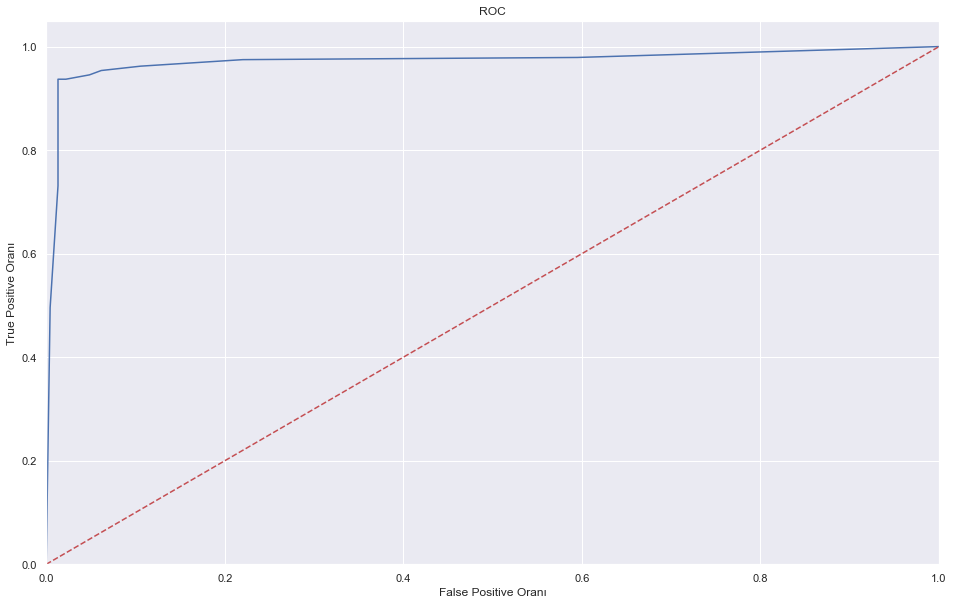

In [95]:
logit_roc_auc = roc_auc_score(y_test, catb_tuned.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, catb_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Burada önemli olan AUC(area under curve) dediğimiz çizdirdiğimiz çizginin altında kalan alanın büyüklüğüdür. Söz konusu alan 1'e ne kadar yakınsa model o kadar başarılı sayılır.

In [96]:
AUC = metrics.auc(fpr, tpr)
AUC = AUC * 100
AUC

97.2133787435679

Diğer başarı metrikleri gibi bunu da yüzdelik biçime çevirdik.

Tek bir defa başarı skoruna bakmak, model hakkında karar vermek için çok erken ve yanıltıcıdır. Modeli defalarca farklı test ve eğitim olacak şekilde kombinleyerek skorlamak daha sağlıklı olacaktır.

In [97]:
cross_val_score(catb_tuned, X_test, y_test, cv = 10)

array([0.93617021, 0.9787234 , 0.91489362, 1.        , 0.9787234 ,
       0.95744681, 0.93617021, 0.95652174, 0.86666667, 0.97777778])

Modeli 10 defa skorladık, bunların ortalamasını alarak daha kesin bir sonuç elde edebiliriz.

In [98]:
CrossValScore = cross_val_score(catb_tuned, X_test, y_test, cv = 10).mean()
CrossValScore = CrossValScore * 100
CrossValScore

95.03093843149347

In [100]:
PrecisionScore = metrics.precision_score(y_test, y_pred, average='weighted')
PrecisionScore = PrecisionScore * 100
PrecisionScore

96.063082437276

In [101]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore = RecallScore * 100
RecallScore

95.91397849462365

In [102]:
F1Score = f1_score(y_test, y_pred, average='weighted')  
F1Score = F1Score * 100
F1Score

95.91348716140838

In [103]:
ROC_AUC_Score = roc_auc_score(y_test, y_pred)
ROC_AUC_Score = ROC_AUC_Score * 100
ROC_AUC_Score

95.97786251064302

10 kez katlamalı çapraz doğrulama skorlarının ortalaması 0 ile 1 arasında bir olasılık değeridir. 100 ile çarptığımızda yüzdelik olarak almış oluruz.

In [104]:
LogLoss = log_loss(y_test, y_pred)
LogLoss

1.4112669898829975

In [105]:
BrierScore = brier_score_loss(y_test, y_pred)
BrierScore = 100 - BrierScore
BrierScore

99.95913978494623

In [106]:
BalancedAccuracyScore = balanced_accuracy_score(y_test, y_pred)
BalancedAccuracyScore = BalancedAccuracyScore * 100
BalancedAccuracyScore

95.97786251064302

In [107]:
JaccardScore = jaccard_score(y_test, y_pred)
JaccardScore = JaccardScore * 100
JaccardScore

92.11618257261411

In [108]:
sonuc = pd.DataFrame([["CAT Boosting", ConfusionMatrixScore, CrossValScore, ROC_AUC_Score, AUC, RecallScore, F1Score, PrecisionScore, JaccardScore, BrierScore, BalancedAccuracyScore, LogLoss]], columns= ["Model", "ConfusionMatrixScore", "CrossValScore", "ROC_AUC_Score", "AUC", "RecallScore", "F1Score", "PrecisionScore", "JaccardScore","BrierScore","BalancedAccuracyScore", "LogLoss"])
sonuclar = sonuclar.append(sonuc)

## Yapay Sinir Ağları Modeli İnşası ve Eğitimi

In [127]:
mlpc = MLPClassifier()

In [128]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [230]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [231]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [232]:
mlpc_cv_model = GridSearchCV(mlpc,
                             mlpc_params, 
                             cv = 10, 
                             n_jobs = -1,
                             verbose = 2)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
               

In [ ]:
mlpc_cv_model.fit(X_train_scaled, y_train)

In [234]:
print("En iyi parametreler : " + str(mlpc_cv_model.best_params_))
print("En iyi skor : " + str(mlpc_cv_model.best_score_))

En iyi parametreler : {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}
En iyi skor : 0.7241379310344828


In [235]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.01, 
                           hidden_layer_sizes = (100,100,100),
                          solver = "adam")

In [236]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Yapay Sinir Ağı Modeli Tahminleri ve Başarı Metrikleri 

In [90]:
y_pred = mlpc_tuned.predict(X_test)

Bu sayede tahmin değerleri ile gerçek değerleri gözlemleyebileceğimiz karmaşıklık matrisini çizdirebiliriz. 

In [91]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[224   3]
 [ 16 222]]


Karmaşıklık matrisi ile modelin doğru ve yanlış tahminlerini mukayese edebiliriz. Sol üst ve sağ alt doğru tahmin çıktıları iken, diğer köşegen yanlış tahmin çıktılarıdır. Aşağıda yapılan işlemler sonucu modelin karmaşıklık matris için başarı skoru yüzdelik bazda görüntülenmektedir.

In [92]:
ConfusionMatrixScore = (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1])
ConfusionMatrixScore  = ConfusionMatrixScore*100
ConfusionMatrixScore

95.91397849462365

Hazır fonksiyon olan "accuracy_score()" ile de aynı çıktıyı alırsak skorun sağlamasını yapmış olacağız.

In [93]:
accuracy_score(y_test, y_pred)

0.9591397849462365

Öte yandan sınıflandırma raporu olarak da bilinen "classification_report()" fonksiyonu bize model hakkında pek çok ayrıntılı bilgiyi detaylı olarak sunar. Modelin başarı durumunu özetleyen, doğruluk, duyarlılık, destek, ağırlıklı ortalama, F istatistikleri gibi pek çok başarı metriğine sınıflandırma raporunu kullanarak erişebiliriz.

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       227
           1       0.99      0.93      0.96       238

    accuracy                           0.96       465
   macro avg       0.96      0.96      0.96       465
weighted avg       0.96      0.96      0.96       465



Sınıflandırma algoritmalarında kullanılan pek çok başarı metriği bazı durumlarda yanıltıcı olabilmektedir. Bu gibi durumlar için ROC - AUC grafiği çizdirilir ve ROC eğrisinin(mavi çizgi) altında kalan alanın büyüklüğü modelin doğruluğu hakkında bize fikir verir. Kırmızı kesikli çizgi ise modelin başarısının %50 olduğu durumu temsil eder. 

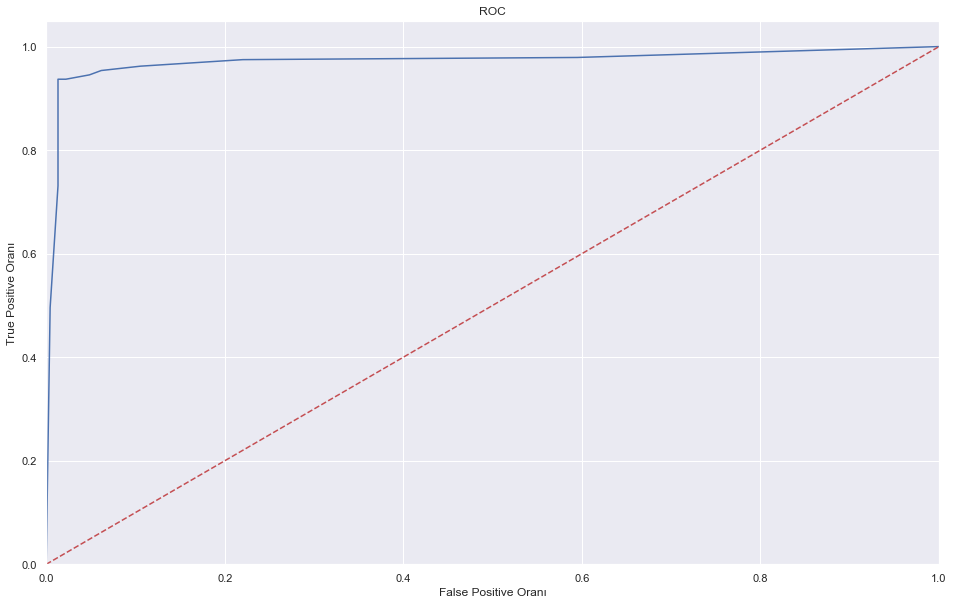

In [95]:
logit_roc_auc = roc_auc_score(y_test, mlpc_tuned.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, mlpc_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Burada önemli olan AUC(area under curve) dediğimiz çizdirdiğimiz çizginin altında kalan alanın büyüklüğüdür. Söz konusu alan 1'e ne kadar yakınsa model o kadar başarılı sayılır.

In [96]:
AUC = metrics.auc(fpr, tpr)
AUC = AUC * 100
AUC

97.2133787435679

Diğer başarı metrikleri gibi bunu da yüzdelik biçime çevirdik.

Tek bir defa başarı skoruna bakmak, model hakkında karar vermek için çok erken ve yanıltıcıdır. Modeli defalarca farklı test ve eğitim olacak şekilde kombinleyerek skorlamak daha sağlıklı olacaktır.

In [97]:
cross_val_score(mlpc_tuned, X_test, y_test, cv = 10)

array([0.93617021, 0.9787234 , 0.91489362, 1.        , 0.9787234 ,
       0.95744681, 0.93617021, 0.95652174, 0.86666667, 0.97777778])

Modeli 10 defa skorladık, bunların ortalamasını alarak daha kesin bir sonuç elde edebiliriz.

In [98]:
CrossValScore = cross_val_score(mlpc_tuned, X_test, y_test, cv = 10).mean()
CrossValScore = CrossValScore * 100
CrossValScore

95.03093843149347

In [100]:
PrecisionScore = metrics.precision_score(y_test, y_pred, average='weighted')
PrecisionScore = PrecisionScore * 100
PrecisionScore

96.063082437276

In [101]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore = RecallScore * 100
RecallScore

95.91397849462365

In [102]:
F1Score = f1_score(y_test, y_pred, average='weighted')  
F1Score = F1Score * 100
F1Score

95.91348716140838

In [103]:
ROC_AUC_Score = roc_auc_score(y_test, y_pred)
ROC_AUC_Score = ROC_AUC_Score * 100
ROC_AUC_Score

95.97786251064302

10 kez katlamalı çapraz doğrulama skorlarının ortalaması 0 ile 1 arasında bir olasılık değeridir. 100 ile çarptığımızda yüzdelik olarak almış oluruz.

In [104]:
LogLoss = log_loss(y_test, y_pred)
LogLoss

1.4112669898829975

In [105]:
BrierScore = brier_score_loss(y_test, y_pred)
BrierScore = 100 - BrierScore
BrierScore

99.95913978494623

In [106]:
BalancedAccuracyScore = balanced_accuracy_score(y_test, y_pred)
BalancedAccuracyScore = BalancedAccuracyScore * 100
BalancedAccuracyScore

95.97786251064302

In [107]:
JaccardScore = jaccard_score(y_test, y_pred)
JaccardScore = JaccardScore * 100
JaccardScore

92.11618257261411

In [108]:
sonuc = pd.DataFrame([["YapaySinirAglari", ConfusionMatrixScore, CrossValScore, ROC_AUC_Score, AUC, RecallScore, F1Score, PrecisionScore, JaccardScore, BrierScore, BalancedAccuracyScore, LogLoss]], columns= ["Model", "ConfusionMatrixScore", "CrossValScore", "ROC_AUC_Score", "AUC", "RecallScore", "F1Score", "PrecisionScore", "JaccardScore","BrierScore","BalancedAccuracyScore", "LogLoss"])
sonuclar = sonuclar.append(sonuc)

# Tüm Modellerin Karşılaştırılması

In [135]:
sonuclar

,Model,ConfusionMatrixScore,CrossValScore,ROC_AUC_Score,AUC,RecallScore,F1Score,PrecisionScore,JaccardScore,BrierScore,BalancedAccuracyScore,LogLoss
0,Lojistik Regresyon,69.2,70.828205,50.663233,54.205680,69.2,61.235769,60.500426,68.571429,99.692,50.663233,10.638157
0,Gaussian Navie Bayes,70.0,70.028205,52.879213,53.628277,70.0,63.653800,63.955084,68.879668,99.700,52.879213,10.361834
0,K Nearest Neighbors,68.8,70.044872,52.450062,52.098939,68.8,63.262626,62.569780,67.500000,99.688,52.450062,10.776297
0,CART,69.2,70.396154,51.076779,58.852216,69.2,61.743973,61.196466,68.442623,99.692,51.076779,10.638154


In [136]:
sonuclar["AVGofScores"] = (sonuclar["ConfusionMatrixScore"] + sonuclar["CrossValScore"] + sonuclar["ROC_AUC_Score"] + sonuclar["AUC"] + sonuclar["RecallScore"] + sonuclar["F1Score"] + sonuclar["PrecisionScore"] + sonuclar["JaccardScore"]+ sonuclar["BrierScore"] + sonuclar["BalancedAccuracyScore"]) / 10 
sonuclar

,Model,ConfusionMatrixScore,CrossValScore,ROC_AUC_Score,AUC,RecallScore,F1Score,PrecisionScore,JaccardScore,BrierScore,BalancedAccuracyScore,LogLoss,AVGofScores
0,Lojistik Regresyon,69.2,70.828205,50.663233,54.205680,69.2,61.235769,60.500426,68.571429,99.692,50.663233,10.638157,65.475998
0,Gaussian Navie Bayes,70.0,70.028205,52.879213,53.628277,70.0,63.653800,63.955084,68.879668,99.700,52.879213,10.361834,66.560346
0,K Nearest Neighbors,68.8,70.044872,52.450062,52.098939,68.8,63.262626,62.569780,67.500000,99.688,52.450062,10.776297,65.766434
0,CART,69.2,70.396154,51.076779,58.852216,69.2,61.743973,61.196466,68.442623,99.692,51.076779,10.638154,66.087699


In [137]:
sonuclar.sort_values(by = "AVGofScores", ascending = False, inplace = True)
sonuclar

,Model,ConfusionMatrixScore,CrossValScore,ROC_AUC_Score,AUC,RecallScore,F1Score,PrecisionScore,JaccardScore,BrierScore,BalancedAccuracyScore,LogLoss,AVGofScores
0,Gaussian Navie Bayes,70.0,70.028205,52.879213,53.628277,70.0,63.653800,63.955084,68.879668,99.700,52.879213,10.361834,66.560346
0,CART,69.2,70.396154,51.076779,58.852216,69.2,61.743973,61.196466,68.442623,99.692,51.076779,10.638154,66.087699
0,K Nearest Neighbors,68.8,70.044872,52.450062,52.098939,68.8,63.262626,62.569780,67.500000,99.688,52.450062,10.776297,65.766434
0,Lojistik Regresyon,69.2,70.828205,50.663233,54.205680,69.2,61.235769,60.500426,68.571429,99.692,50.663233,10.638157,65.475998


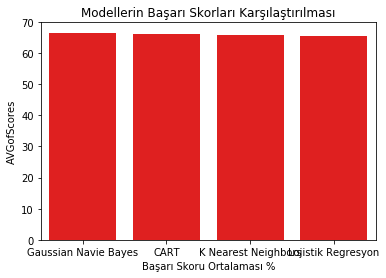

In [138]:
sns.barplot(x = "Model", y = "AVGofScores", data = sonuclar, color = "r")
plt.xlabel("Başarı Skoru Ortalaması %")
plt.title("Modellerin Başarı Skorları Karşılaştırılması");

## En iyi model için en etkili öznitelikler

In [140]:
Importance = pd.DataFrame({"Onemlilik": cart_tuned.feature_importances_*100}, index = X_train.columns)

In [141]:
Importance.sort_values(by = "Onemlilik", ascending = False)

,Onemlilik
krediMiktari,54.365651
yas,30.220367
evDurumu,6.592298
telefonDurumu,5.726096
aldigi_kredi_sayi,3.095588


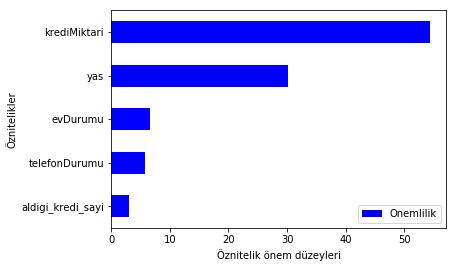

In [142]:
Importance.sort_values(by = "Onemlilik",
                      axis = 0,
                      ascending = True).plot(kind = "barh", color = "b")

plt.xlabel("Öznitelik önem düzeyleri");
plt.ylabel("Öznitelikler");